### This is a WinBUGS program for the artificial example in Chapter 12, Section 12.6.

Model: Nonlinear Structural Equation Model with nonignorable missing data

Data Set Names: YO.dat and IR.dat

Sample Size: N = 712

In [1]:
source(".Rprofile")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘magrittr’


The following object is masked from ‘package:purrr’:

    set_names


The following object is masked from ‘package:tidyr’:

    extract


Linked to JAGS 4.3.2

Loaded modules: basemod,bugs

nimble version 1.1.0 is loaded.
For more information on NIMBLE and a User Manual,
please visit https://R-nimble.org.

Note for advanced users who have written their own MCMC samplers:
  As of version 0.13.0, NIMBLE's protocol for handling posterior
  pr

#### Model with known thresholds

##### Data Set

In [48]:
data <- lst(
    N = 712,
    P = 8,
    u = c(0,0),
    RR = matrix(
        c(  2.3, 0.3,
            0.3, 1.6 ),
        nrow = 2,
        byrow = TRUE
    ),
    y_raw = matrix(
        scan(
            file = "./Chapter12/ch12-WinBUGS-data.dat",
            what = numeric(),
            sep = ",",
            skip = 2,
            nlines = N
        ),
        nrow = N,
        byrow = TRUE
    )[,1:P],
    N_mis = sum(is.na(y_raw)),
    R = matrix(
        scan(
            file = "./Chapter12/ch12-WinBUGS-data.dat",
            what = numeric(),
            sep = ",",
            skip = 717,
            nlines = N,
            strip.white = TRUE
        ) %>% na.omit(),
        ncol = P,
        byrow = TRUE
    )
)

# Sustituting NAs
data$y_raw[is.na(data$y_raw)]  <- -999

Warning message in matrix(scan(file = "./Chapter12/ch12-WinBUGS-data.dat", what = numeric(), :
“data length [6407] is not a sub-multiple or multiple of the number of rows [712]”


#### Three different initial values

In [3]:
inits <- lst(
     inits1 = list(
          gam = c(-0.5, -0.5, -0.5),
          lam = c(-0.4, -0.4, -0.4, -0.4, -0.4),
          b = c(-0.2, -0.2, -0.2, -0.2, -0.2, -0.2, -0.2, -0.2, -0.2),
          psi = c(0.6, 0.7, 0.8, 0.75, 0.65, 0.76, 0.85, 0.89),
          psd = 0.27,
          vu = c(-0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1),
          phi = structure(
               .Data = c(
                    0.42, 0.0,
                    0.0,  0.25
               ),
               .Dim = c(2,2)
          )
     ),
     inits2 = list(
          gam = c(0.5, 0.5, 0.5),
          lam = c(0.4, 0.4, 0.4, 0.4, 0.4),
          b = c(0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5),
          psi = c(0.3, 0.47, 0.48, 0.5, 0.35, 0.36, 0.45, 0.49),
          psd = 0.3,
          vu = c(0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1),
          phi = structure(
               .Data = c(
                    0.57, -0.25,
                    -0.25, 0.46
               ),
               .Dim = c(2,2)
          )
     ),
     inits3 = list(
          gam = c(0.0, 0.0, 0.0),
          lam = c(0.0, 0.0, 0.0, 0.0, 0.0), 
          b = c(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0),
          psi = c(0.73, 0.77, 0.78, 0.58, 0.75, 0.86, 0.95, 0.79),
          psd = 0.2,
          vu = c(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0),
          phi = structure(
               .Data = c(
                    0.51,-0.35,
                    -0.35,0.66
               ),
               .Dim=c(2,2)
          )
     )
)

#### Model fit parameters

In [4]:
param <- c("lam", "psi", "gam", "phi", "vu", "xi") # Monitored parameters
chains <- 3 # Chains
iter <- 10000 # Total iterations
burnin  <- 5000 # Number of iterations to discard
output_dir <- glue("{getwd()}/Chapter12/output")
if( !dir.exists(output_dir) ) dir.create(output_dir)
model <- lst()
# fit <- lst()
if(file.exists("./Chapter12/fits.Rds")) {
    fit <- readRDS("./Chapter12/fits.Rds")
} else fit <- lst()

##### Check model

##### Compile model

In [51]:
model$path  <-  glue("{getwd()}/Chapter12/ch12-Stan-model.stan")
cmdstan_model(model$path, compile = FALSE)$check_syntax(pedantic = TRUE)


    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
    calculation.
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.


Stan program is syntactically correct



In [56]:
if(cmdstan_model(model$path, compile = FALSE)$check_syntax(pedantic = TRUE)) {
    model$stan <- cmdstan_model(
        model$path,
        force_recompile = TRUE
    )
}


    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
    calculation.
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.


Stan program is syntactically correct



In [57]:
model$fit <- model$stan$sample(
  data = data,
  seed = 69,
  refresh = 500,
  init = inits,
  output_dir = output_dir,
  sig_figs = 5,
  chains = chains,
  parallel_chains = getOption("mc.cores", chains),
  opencl_ids = NULL,
  iter_warmup = burnin,
  iter_sampling = iter - burnin,
  save_warmup = TRUE
)

Init values were only set for a subset of parameters. 
Missing init values for the following parameters:
 - chain 1: y_mis, xi_a, xxi, eta
 - chain 2: y_mis, xi_a, xxi, eta
 - chain 3: y_mis, xi_a, xxi, eta




Running MCMC with 3 chains, at most 16 in parallel...

Chain 1 Iteration:    1 / 10000 [  0%]  (Warmup) 


Chain 1 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 1 Exception: gamma_lpdf: Random variable[1] is inf, but must be positive finite! (in '/tmp/RtmpVhAreK/model-14cf369b830b.stan', line 96, column 4 to column 27)

Chain 1 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 1 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 1 

Chain 1 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 1 Exception: gamma_lpdf: Random variable[1] is inf, but must be positive finite! (in '/tmp/RtmpVhAreK/model-14cf369b830b.stan', line 96, column 4 to column 27)

Chain 1 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 1 but if

Chain 2 Iteration:    1 / 10000 [  0%]  (Warmup) 


Chain 2 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 2 Exception: gamma_lpdf: Random variable[1] is inf, but must be positive finite! (in '/tmp/RtmpVhAreK/model-14cf369b830b.stan', line 96, column 4 to column 27)

Chain 2 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 2 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 2 

Chain 2 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 2 Exception: gamma_lpdf: Random variable[1] is inf, but must be positive finite! (in '/tmp/RtmpVhAreK/model-14cf369b830b.stan', line 96, column 4 to column 27)

Chain 2 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 2 but if

Chain 3 Iteration:    1 / 10000 [  0%]  (Warmup) 


Chain 3 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 3 Exception: gamma_lpdf: Random variable[1] is inf, but must be positive finite! (in '/tmp/RtmpVhAreK/model-14cf369b830b.stan', line 96, column 4 to column 27)

Chain 3 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 3 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 3 

Chain 3 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 3 Exception: gamma_lpdf: Random variable[1] is inf, but must be positive finite! (in '/tmp/RtmpVhAreK/model-14cf369b830b.stan', line 96, column 4 to column 27)

Chain 3 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 3 but if

In [ ]:
saveRDS(
    model, 
    file = glue("{getwd()}/Chapter12/fitted-model.Rds")
)

Warning message:
“Dropping 'draws_df' class as required metadata was removed.”
Warning message:
“Dropping 'draws_df' class as required metadata was removed.”


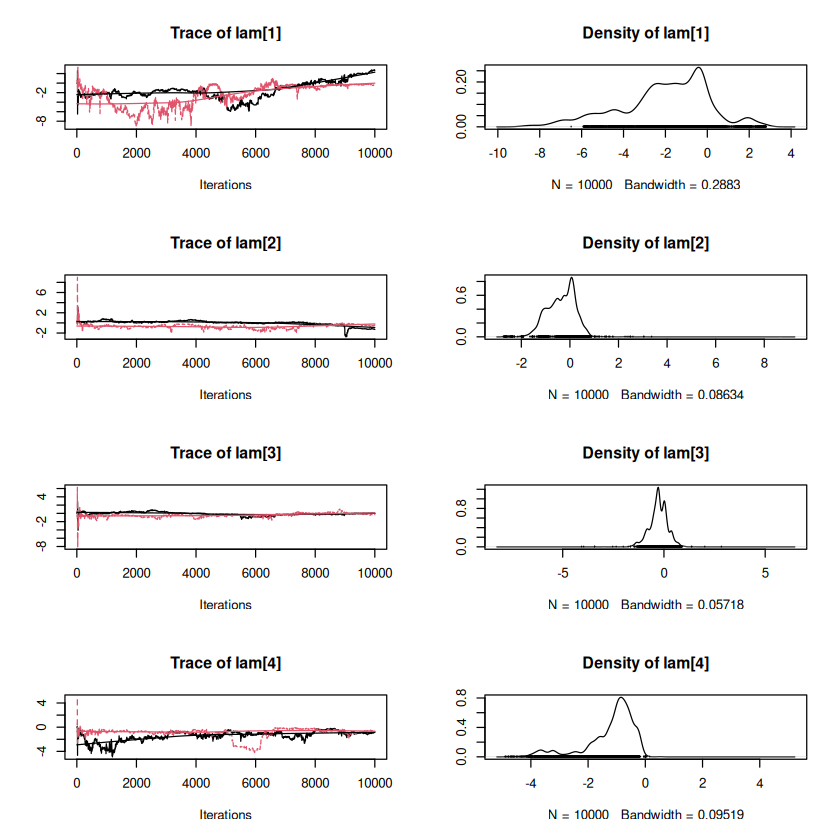

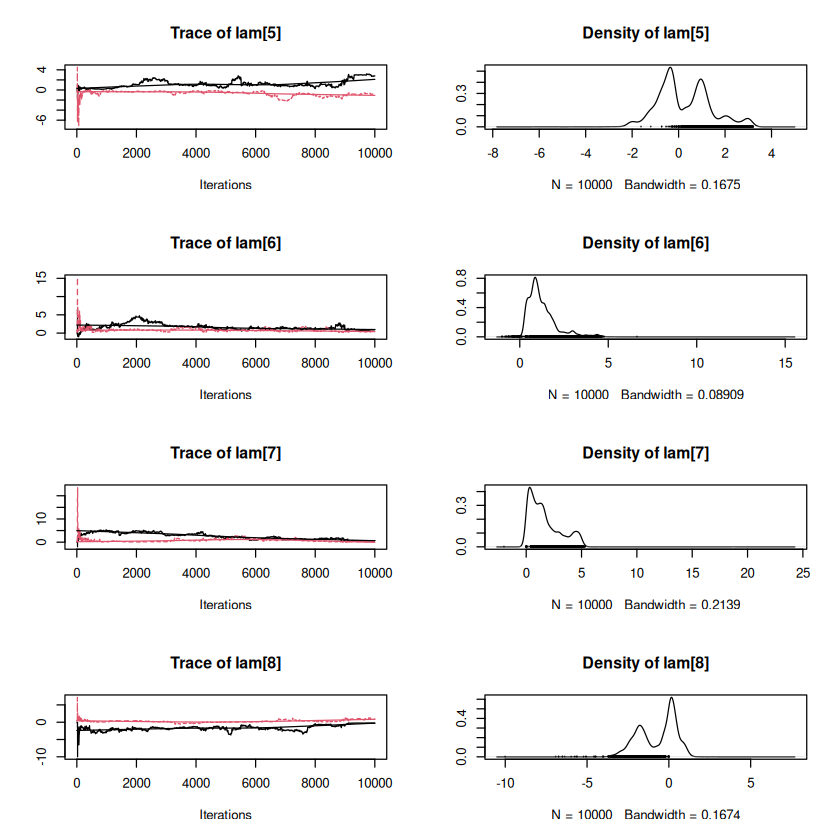

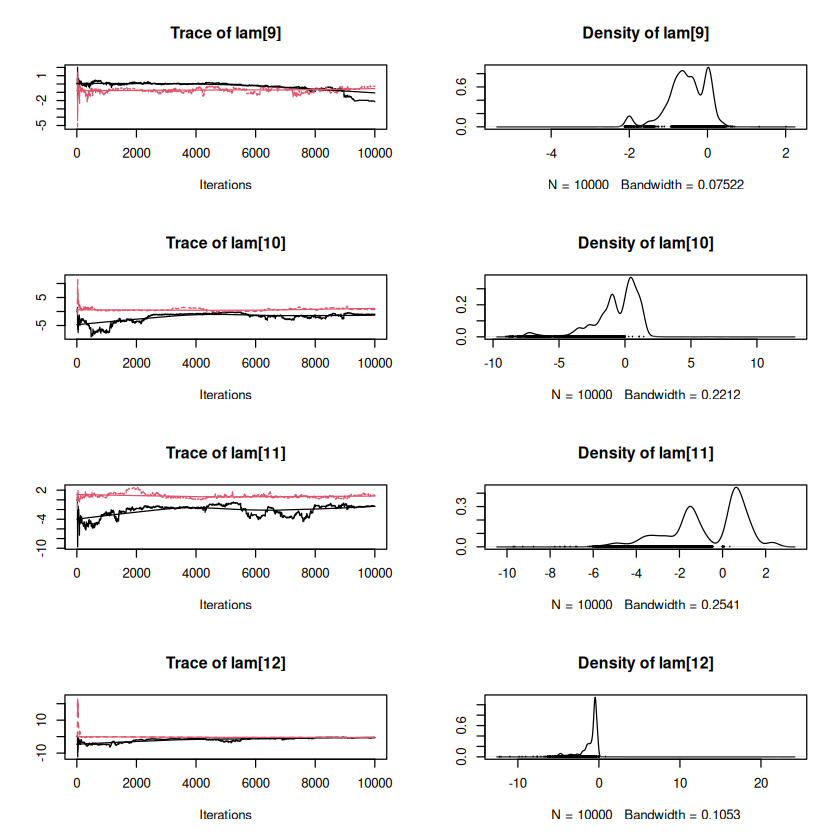

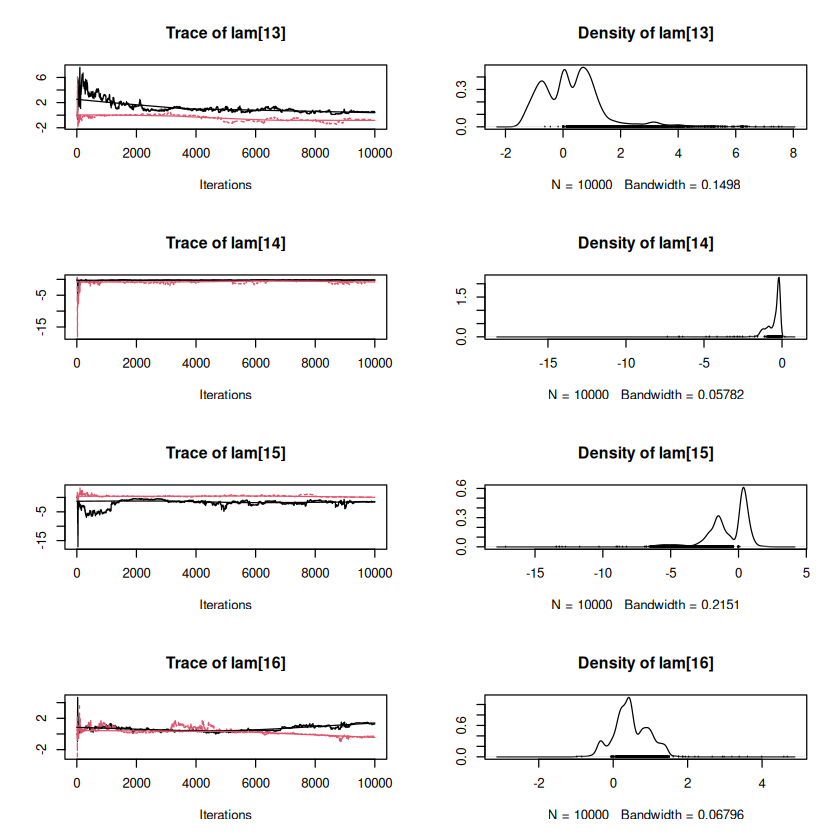

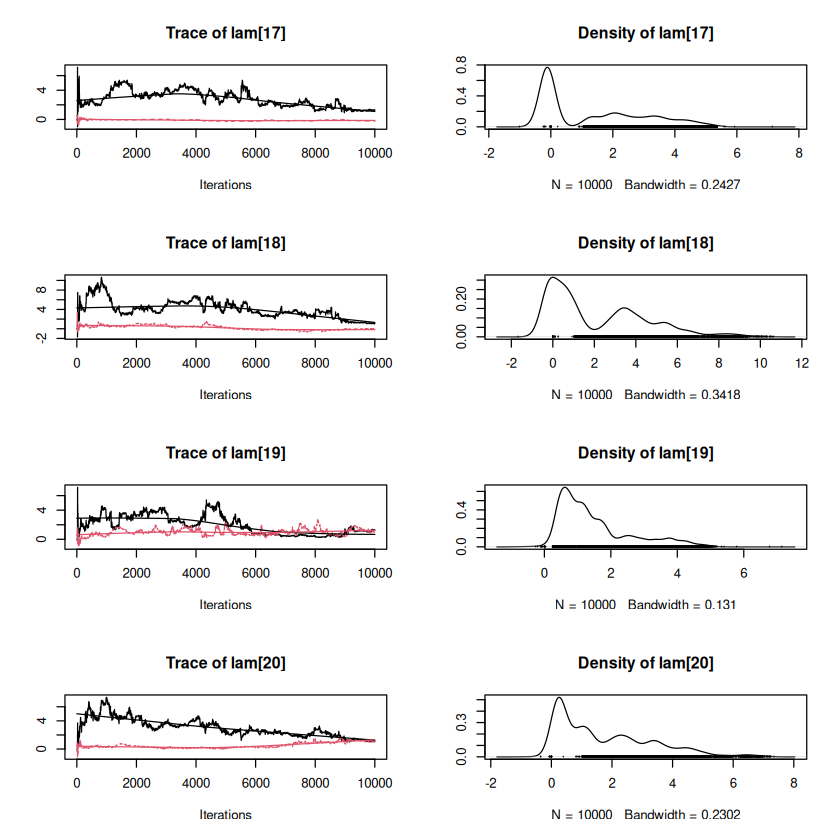

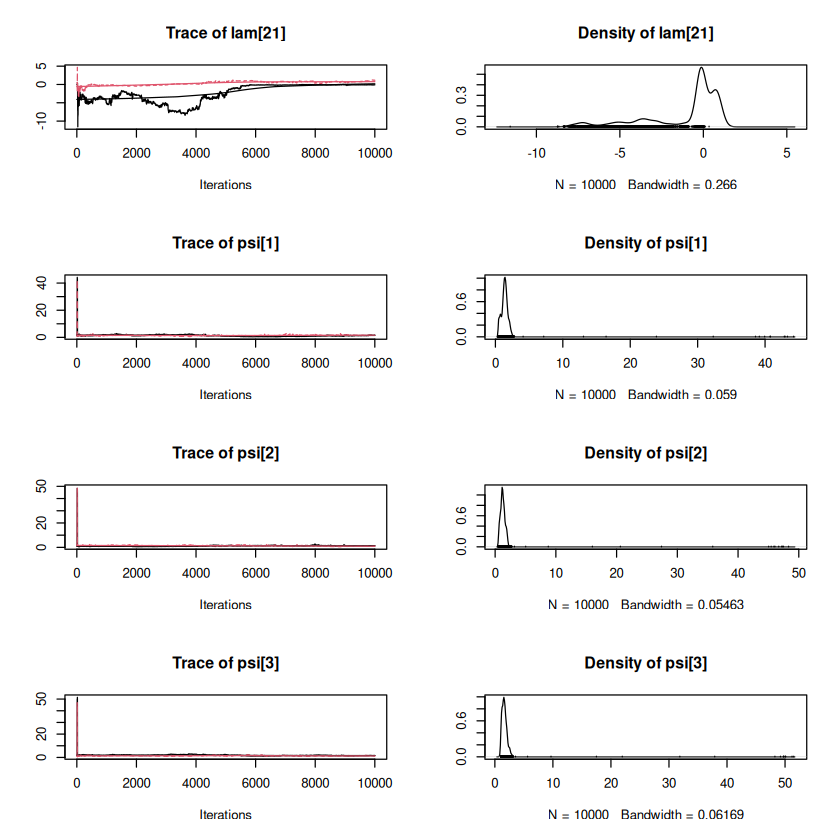

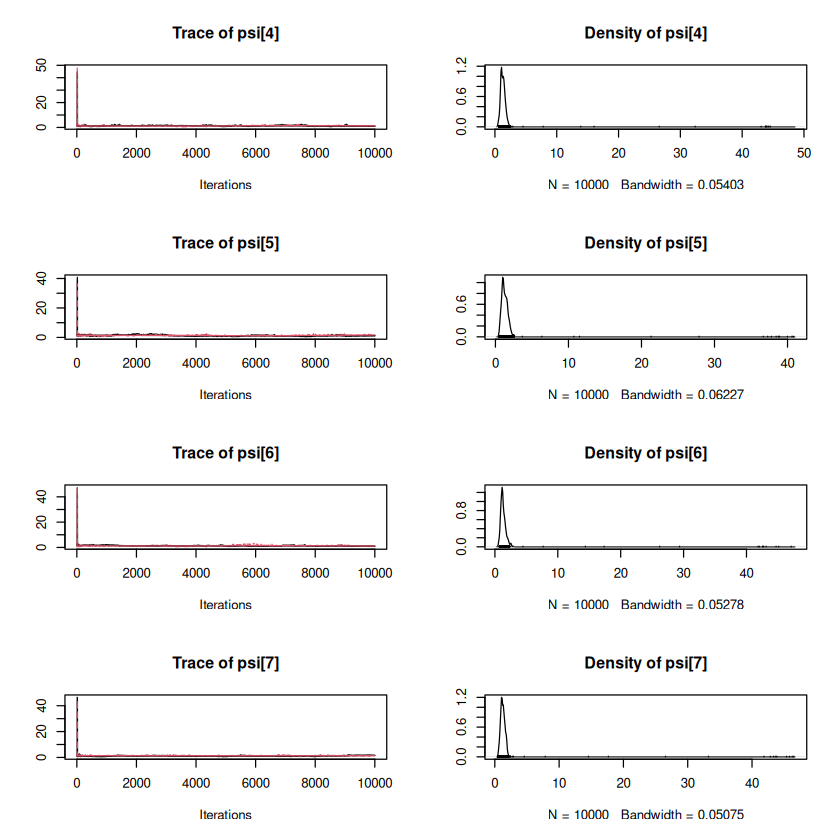

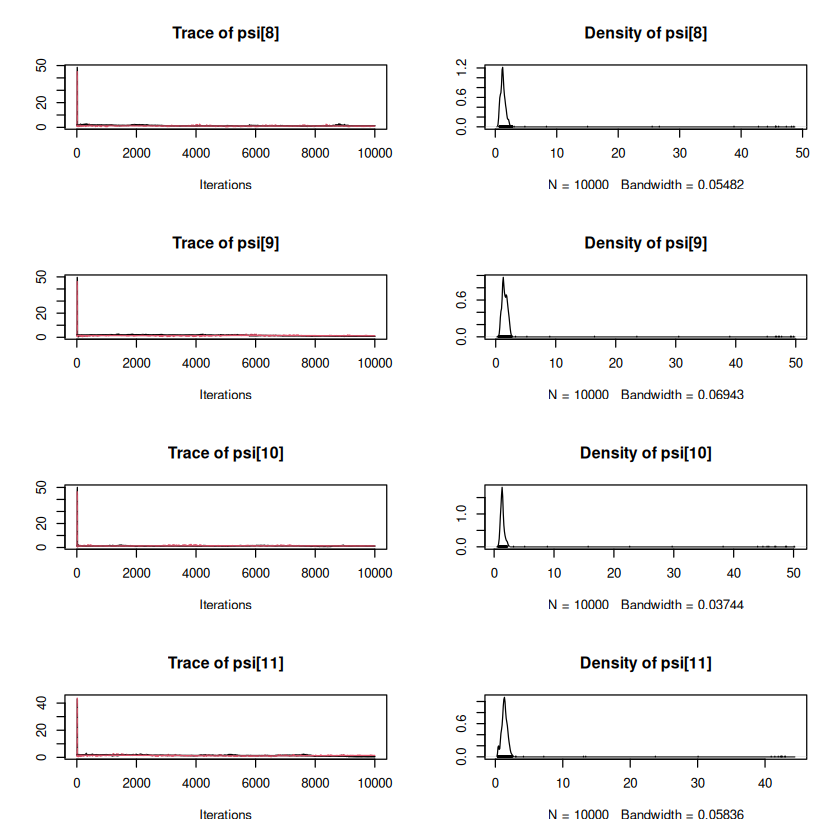

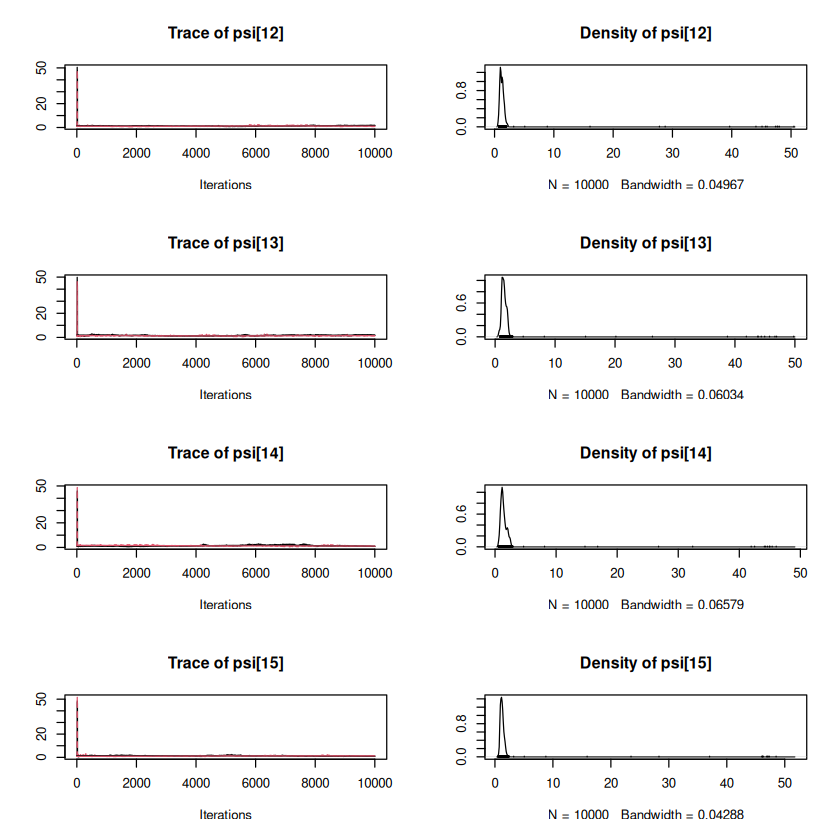

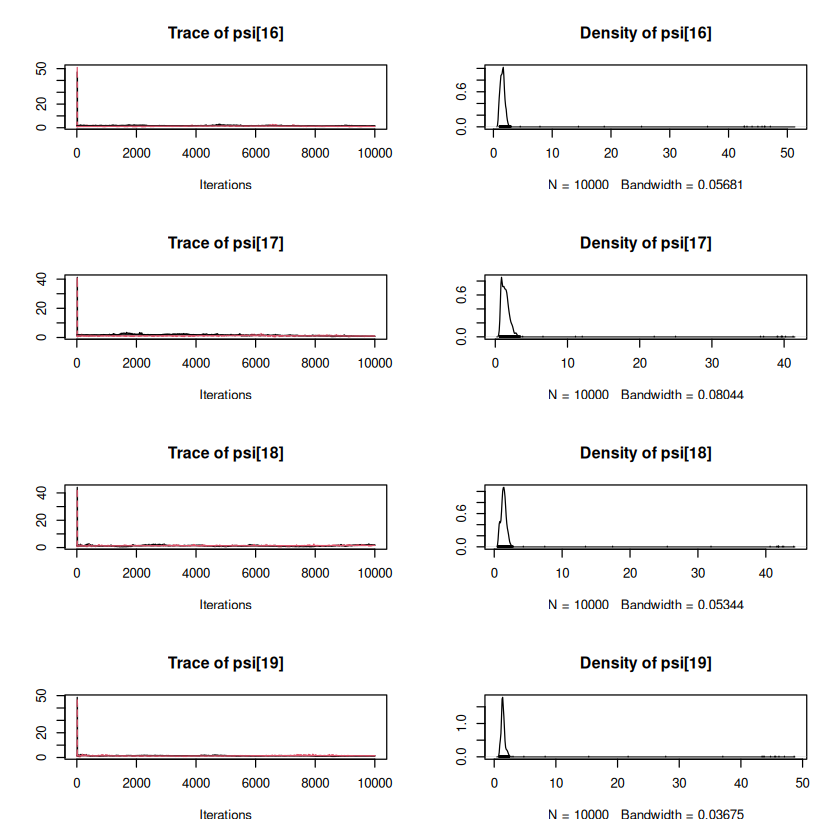

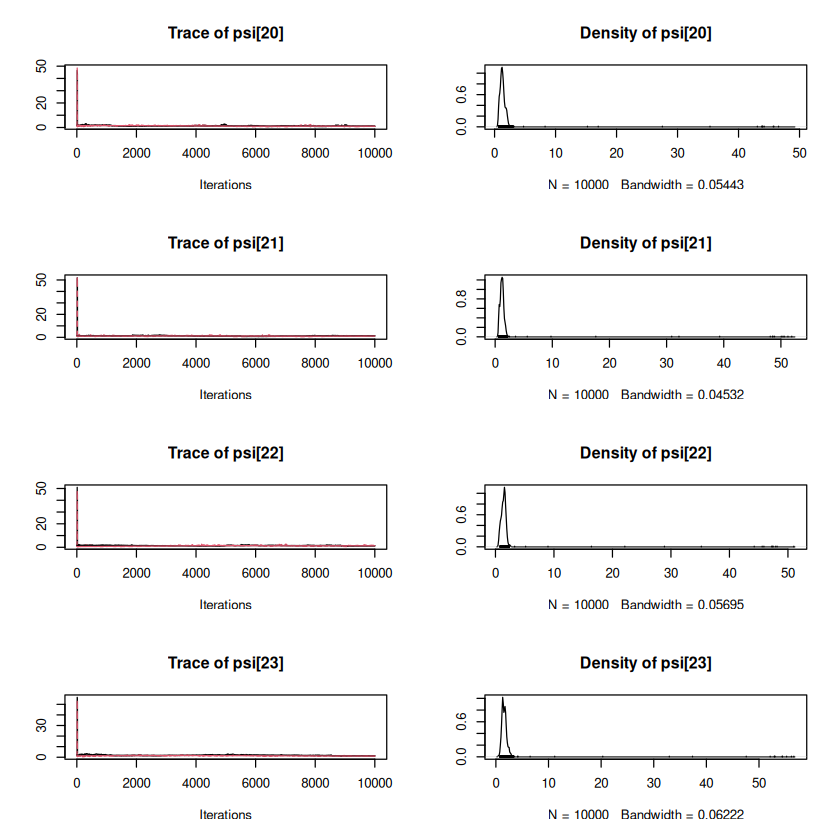

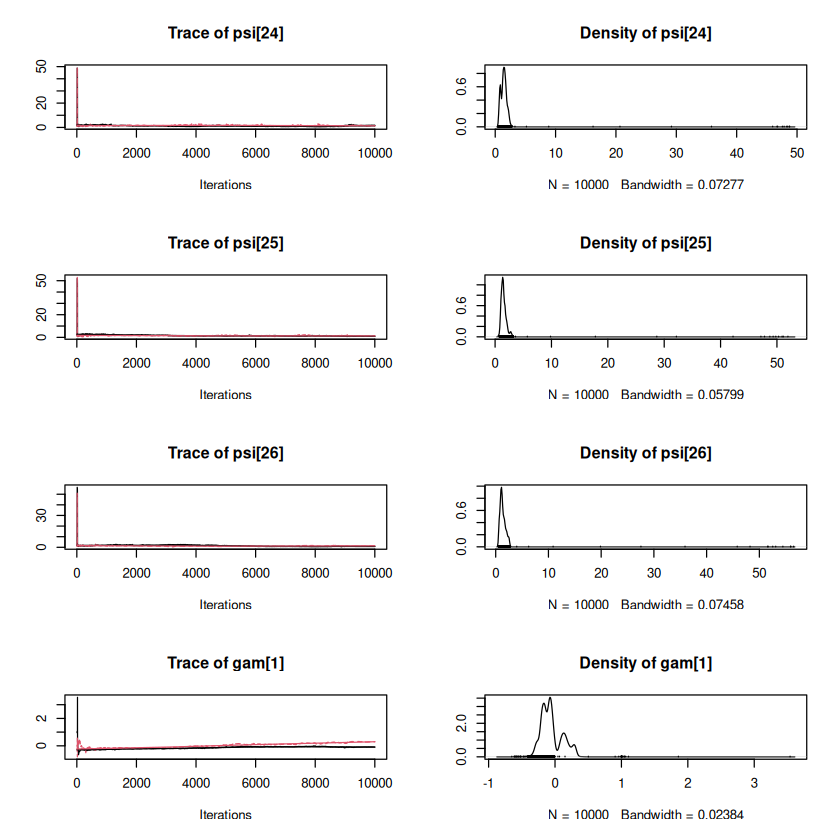

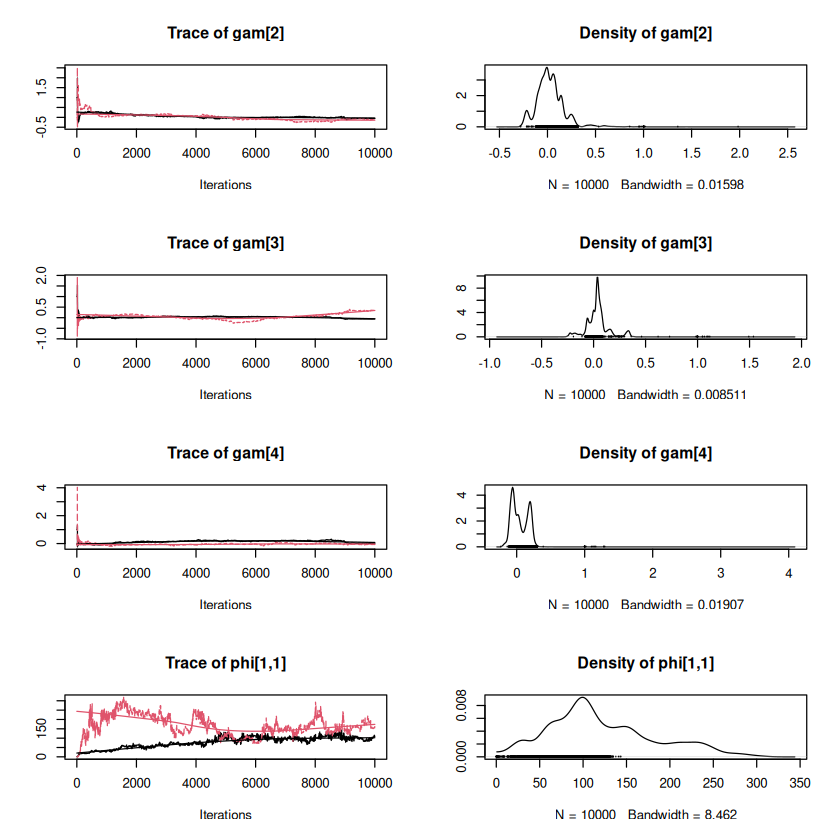

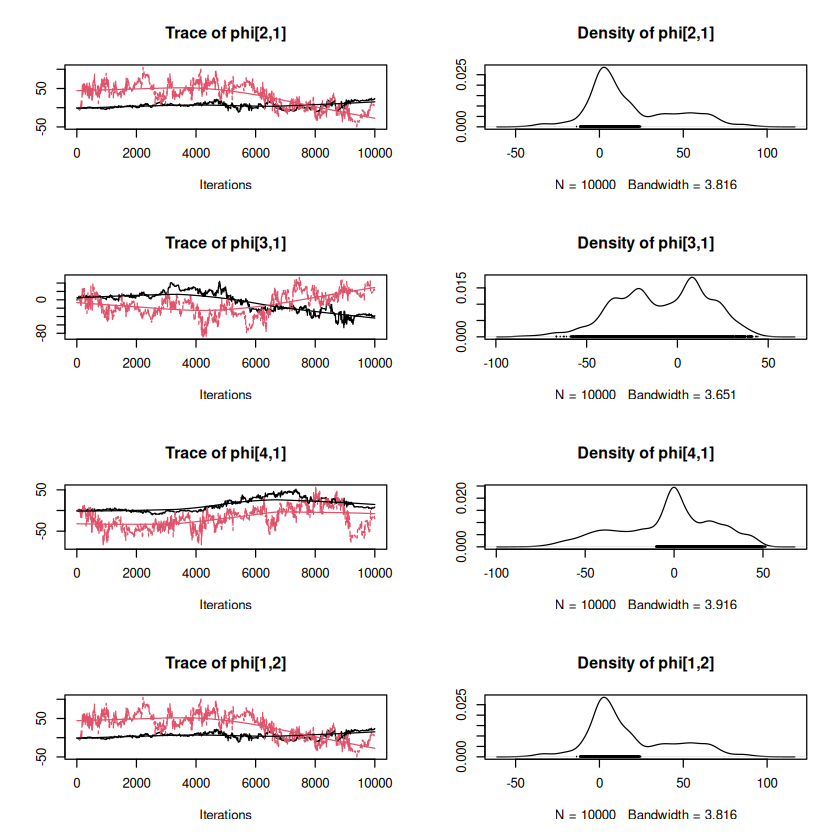

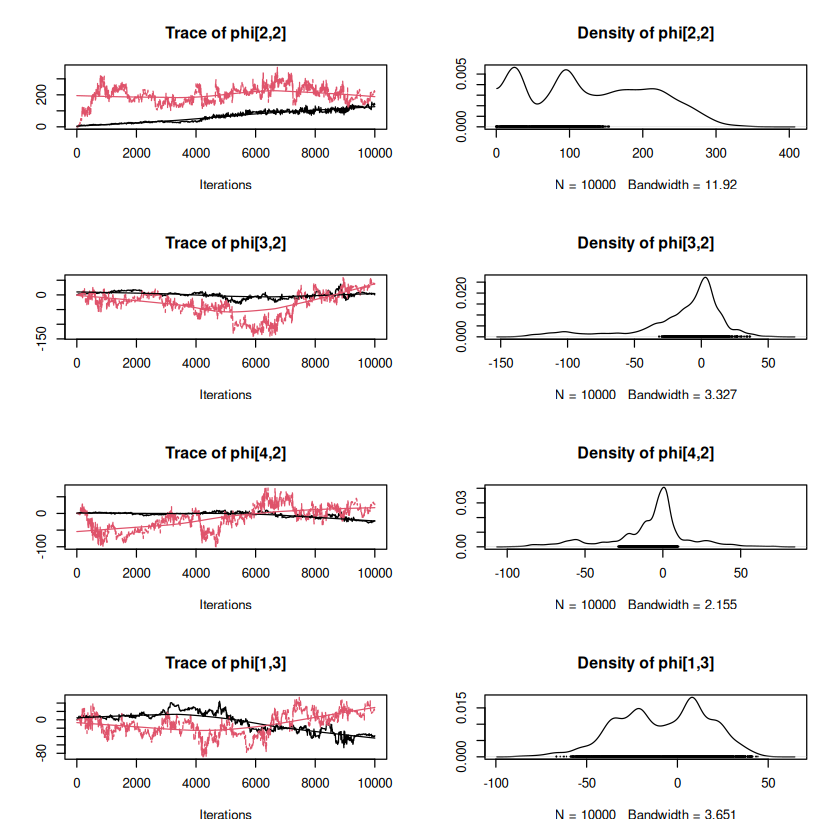

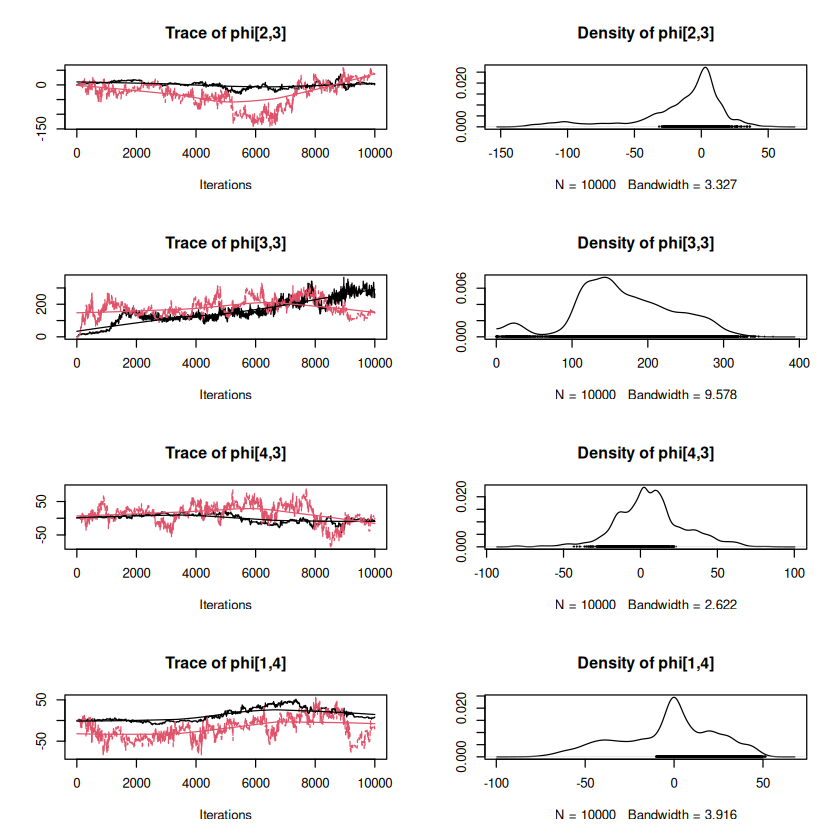

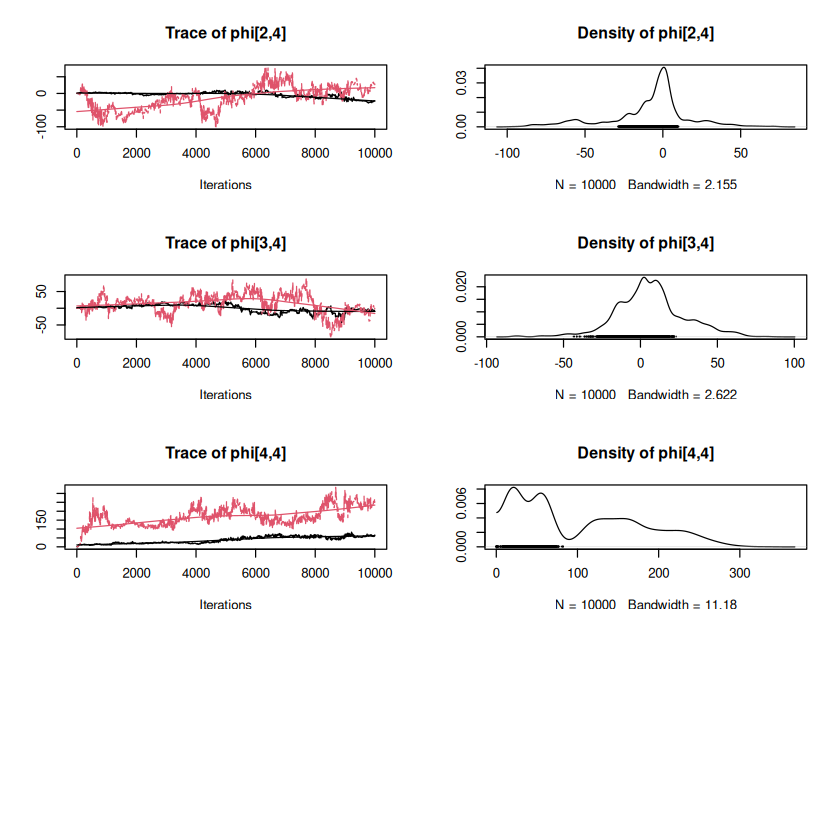

In [78]:
# Extract posterior draws for variables of interest.
fit$stan_lee$draws(
    variables = param[-5],
    inc_warmup = TRUE,
    format = "df"
) %>% 
# Split data frame into list of dataframes by chain number.
split(f = .$.chain) %>% 
# Drop unneeded variables and convert to MCMC object.
lapply(
    function(x) {
        select(x, -c(".chain", ".iteration", ".draw")) %>%
        mcmc()
    }
)  %>%
# Plot posterior draws
mcmc.list() %>%
plot()

<!-- ##### Fit model on GPU using OpenCL -->

In [5]:
# opencl_ids <- system("clinfo -l | grep 'NVIDIA'", intern = TRUE) %>%
# str_extract("\\d")

# model_CL <- cmdstan_model(
#     model, 
#     force_recompile = TRUE,
#     cpp_options = list(stan_opencl = TRUE)
# )
# model_CL$sample(
#   data = data,
#   seed = 69,
#   refresh = 500,
#   init = inits,
#   sig_figs = 5,
#   chains = n.chains,
#   parallel_chains = getOption("mc.cores", 1),
#   opencl_ids = opencl_ids,
#   iter_warmup = n.burnin,
#   iter_sampling = n.iter,
#   save_warmup = TRUE
# )

# save.image()

#### Logistic model with unknown thresholds

##### Data

In [21]:
data$no_thresh <- data$lee
data$no_thresh[["thd"]] <- NULL

##### Priors

In [26]:
inits %>% glimpse()

List of 2
 $ lee       :List of 2
  ..$ :List of 6
  .. ..$ lam: num [1:21] 0 0 0 0 0 0 0 0 0 0 ...
  .. ..$ psi: num [1:26] 1 1 1 1 1 1 1 1 1 1 ...
  .. ..$ psd: num 1
  .. ..$ gam: num [1:4] 1 1 1 1
  .. ..$ phi: num [1:4, 1:4] 1 0 0 0 0 1 0 0 0 0 ...
  .. ..$ xi : num [1:338, 1:4] 0 0 0 0 0 0 0 0 0 0 ...
  ..$ :List of 6
  .. ..$ lam: num [1:21] 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 ...
  .. ..$ psi: num [1:26] 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 ...
  .. ..$ psd: num 0.6
  .. ..$ gam: num [1:4] 0 0 0 0
  .. ..$ phi: num [1:4, 1:4] 0.5 0 0 0 0 0.5 0 0 0 0 ...
  .. ..$ xi : num [1:338, 1:4] 0 0 0 0 0 0 0 0 0 0 ...
 $ thd_priors:List of 2
  ..$ :List of 7
  .. ..$ lam: num [1:21] 0 0 0 0 0 0 0 0 0 0 ...
  .. ..$ psi: num [1:26] 1 1 1 1 1 1 1 1 1 1 ...
  .. ..$ psd: num 1
  .. ..$ gam: num [1:4] 1 1 1 1
  .. ..$ phi: num [1:4, 1:4] 1 0 0 0 0 1 0 0 0 0 ...
  .. ..$ xi : num [1:338, 1:4] 0 0 0 0 0 0 0 0 0 0 ...
  .. ..$ thd: num [1:26, 1:4] -2.52 -1.45 -1.67 -1.64 -1.67 ...
  ..$ :

In [25]:
inits$thd_priors <- inits$lee
inits$thd_priors[[1]]$thd <- thd[, 2:5]
inits$thd_priors[[2]]$thd <- thd[, 2:5]

##### Check model

In [17]:
model$logistic  <-  paste0(getwd(), "/Chapter6/ch6-Stan-logistic-model.stan")
cmdstan_model(model$logistic, compile = FALSE)$check_syntax(pedantic = TRUE)

Warning in '/home/pal_bjartan/Backup/PhD/SEM-test-model/Lee2007/Chapter6/ch6-Stan-logistic-model.stan', line 72, column 34: A
    multi_normal_cholesky distribution is given parameter phi as a covariance
    matrix (argument 2), but phi was not constrained to be Cholesky factor of
    covariance.
Warning in '/home/pal_bjartan/Backup/PhD/SEM-test-model/Lee2007/Chapter6/ch6-Stan-logistic-model.stan', line 68, column 27: Argument
    30 suggests there may be parameters that are not unit scale; consider
    rescaling with a multiplier (see manual section 22.12).
Warning in '/home/pal_bjartan/Backup/PhD/SEM-test-model/Lee2007/Chapter6/ch6-Stan-logistic-model.stan', line 68, column 4: Parameter
    phi is given a wishart_cholesky distribution, which has Cholesky factor
    of covariance support, but phi was not constrained to be Cholesky factor
    of covariance.
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
    provided, or the 

##### Compile model

In [25]:
model$logistic <- cmdstan_model(
    model$logistic,
    force_recompile = TRUE
)

fit$stan_logistic <- model$logistic$sample(
  data = data$no_thresh,
  seed = 69,
  refresh = 500,
  init = inits$thd_priors,
  output_dir = output_dir,
  sig_figs = 5,
  chains = chains,
  parallel_chains = getOption("mc.cores", chains),
  opencl_ids = NULL,
  iter_warmup = burnin,
  iter_sampling = iter - burnin,
  save_warmup = TRUE
)

Init values were only set for a subset of parameters. 
Missing init values for the following parameters:
 - chain 1: eta, thd
 - chain 2: eta, thd




Running MCMC with 2 chains, at most 16 in parallel...

Chain 1 Iteration:    1 / 10000 [  0%]  (Warmup) 


Chain 1 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 1 Exception: ordered_logistic: Cut-points is not a valid ordered vector. The element at 2 is -161.382, but should be greater than the previous element, -161.382 (in '/tmp/RtmpS5Liea/model-7aeb323005272.stan', line 114, column 2 to column 35)

Chain 1 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 1 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 1 

Chain 1 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 1 Exception: ordered_logistic: Cut-points is not a valid ordered vector. The element at 2 is -160.631, but should be greater than the previous element, -160.631 (in '/tmp/RtmpS5Liea/model-7aeb323005272.stan', line 114, column 2 to column

Chain 2 Iteration:    1 / 10000 [  0%]  (Warmup) 


Chain 2 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 2 Exception: ordered_logistic: Cut-points is not a valid ordered vector. The element at 3 is -75.156, but should be greater than the previous element, -75.156 (in '/tmp/RtmpS5Liea/model-7aeb323005272.stan', line 114, column 2 to column 35)

Chain 2 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 2 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 2 

Chain 2 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 2 Exception: ordered_logistic: Cut-points is not a valid ordered vector. The element at 3 is -73.7541, but should be greater than the previous element, -73.7541 (in '/tmp/RtmpS5Liea/model-7aeb323005272.stan', line 114, column 2 to column 3

Chain 1 Iteration:  500 / 10000 [  5%]  (Warmup) 
Chain 2 Iteration:  500 / 10000 [  5%]  (Warmup) 
Chain 1 Iteration: 1000 / 10000 [ 10%]  (Warmup) 
Chain 2 Iteration: 1000 / 10000 [ 10%]  (Warmup) 
Chain 1 Iteration: 1500 / 10000 [ 15%]  (Warmup) 
Chain 2 Iteration: 1500 / 10000 [ 15%]  (Warmup) 
Chain 1 Iteration: 2000 / 10000 [ 20%]  (Warmup) 
Chain 1 Iteration: 2001 / 10000 [ 20%]  (Sampling) 
Chain 2 Iteration: 2000 / 10000 [ 20%]  (Warmup) 
Chain 2 Iteration: 2001 / 10000 [ 20%]  (Sampling) 
Chain 1 Iteration: 2500 / 10000 [ 25%]  (Sampling) 
Chain 2 Iteration: 2500 / 10000 [ 25%]  (Sampling) 
Chain 1 Iteration: 3000 / 10000 [ 30%]  (Sampling) 
Chain 2 Iteration: 3000 / 10000 [ 30%]  (Sampling) 
Chain 1 Iteration: 3500 / 10000 [ 35%]  (Sampling) 
Chain 2 Iteration: 3500 / 10000 [ 35%]  (Sampling) 
Chain 1 Iteration: 4000 / 10000 [ 40%]  (Sampling) 
Chain 2 Iteration: 4000 / 10000 [ 40%]  (Sampling) 
Chain 1 Iteration: 4500 / 10000 [ 45%]  (Sampling) 
Chain 2 Iteration: 4500 / 10

See https://mc-stan.org/misc/warnings for details.


See https://mc-stan.org/misc/warnings for details.




#### edm's model

##### Priors

In [38]:
inits$edm <- list(lam = array(1, 21), gam = array(0, 4), psd = 1, phi = diag(1, 4),
              xi = array(.1, c(nrow(data$edm$z), 4)), eta = array(.1, nrow(data$edm$z)),
              thd = t(array(seq(-1, 1, length.out = 4), c(4, ncol(data$edm$z)))))
inits$edm <- lapply(1:4, function(x) inits$edm)

inits$edm %>% glimpse()

List of 4
 $ :List of 7
  ..$ lam: num [1:21(1d)] 1 1 1 1 1 1 1 1 1 1 ...
  ..$ gam: num [1:4(1d)] 0 0 0 0
  ..$ psd: num 1
  ..$ phi: num [1:4, 1:4] 1 0 0 0 0 1 0 0 0 0 ...
  ..$ xi : num [1:338, 1:4] 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 ...
  ..$ eta: num [1:338(1d)] 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 ...
  ..$ thd: num [1:26, 1:4] -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 ...
 $ :List of 7
  ..$ lam: num [1:21(1d)] 1 1 1 1 1 1 1 1 1 1 ...
  ..$ gam: num [1:4(1d)] 0 0 0 0
  ..$ psd: num 1
  ..$ phi: num [1:4, 1:4] 1 0 0 0 0 1 0 0 0 0 ...
  ..$ xi : num [1:338, 1:4] 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 ...
  ..$ eta: num [1:338(1d)] 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 ...
  ..$ thd: num [1:26, 1:4] -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 ...
 $ :List of 7
  ..$ lam: num [1:21(1d)] 1 1 1 1 1 1 1 1 1 1 ...
  ..$ gam: num [1:4(1d)] 0 0 0 0
  ..$ psd: num 1
  ..$ phi: num [1:4, 1:4] 1 0 0 0 0 1 0 0 0 0 ...
  ..$ xi : num [1:338, 1:4] 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 ...
  ..$ eta: num [1:

##### Check, compile and run model

In [61]:
model$edm <- cmdstan_model(
    glue("{getwd()}/Chapter6/ch6-Stan-edm-model.stan"), 
    compile = FALSE
)
if ( model$edm$check_syntax(pedantic = TRUE ) == TRUE) {
    model$edm$compile(force_recompile = TRUE)
    fit$edm <- model$edm$sample(
    data = data$no_thresh,
    seed = 69,
    refresh = 500,
    init = inits$edm,
    output_dir = output_dir,
    sig_figs = 5,
    chains = length(inits$edm),
    parallel_chains = getOption("mc.cores"),
    opencl_ids = NULL,
    iter_warmup = burnin,
    iter_sampling = iter - burnin,
    save_warmup = TRUE
    )
}

    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.


Stan program is syntactically correct



Init values were only set for a subset of parameters. 
Missing init values for the following parameters:
 - chain 1: eta_std
 - chain 2: eta_std
 - chain 3: eta_std
 - chain 4: eta_std




Running MCMC with 4 parallel chains...

Chain 1 Iteration:    1 / 10000 [  0%]  (Warmup) 


Chain 1 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 1 Exception: cholesky_decompose: Matrix m is not positive definite (in '/tmp/Rtmpv1FJd4/model-89482a887896.stan', line 26, column 2 to column 45)

Chain 1 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 1 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 1 

Chain 1 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 1 Exception: cholesky_decompose: Matrix m is not positive definite (in '/tmp/Rtmpv1FJd4/model-89482a887896.stan', line 26, column 2 to column 45)

Chain 1 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 1 but if this warning occurs often t

Chain 2 Iteration:    1 / 10000 [  0%]  (Warmup) 


Chain 2 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 2 Exception: cholesky_decompose: Matrix m is not positive definite (in '/tmp/Rtmpv1FJd4/model-89482a887896.stan', line 26, column 2 to column 45)

Chain 2 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 2 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 2 

Chain 2 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 2 Exception: cholesky_decompose: Matrix m is not positive definite (in '/tmp/Rtmpv1FJd4/model-89482a887896.stan', line 26, column 2 to column 45)

Chain 2 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 2 but if this warning occurs often t

Chain 3 Iteration:    1 / 10000 [  0%]  (Warmup) 


Chain 3 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 3 Exception: cholesky_decompose: Matrix m is not positive definite (in '/tmp/Rtmpv1FJd4/model-89482a887896.stan', line 26, column 2 to column 45)

Chain 3 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 3 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 3 

Chain 3 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 3 Exception: cholesky_decompose: Matrix m is not positive definite (in '/tmp/Rtmpv1FJd4/model-89482a887896.stan', line 26, column 2 to column 45)

Chain 3 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 3 but if this warning occurs often t

Chain 4 Iteration:    1 / 10000 [  0%]  (Warmup) 


Chain 4 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 4 Exception: cholesky_decompose: Matrix m is not positive definite (in '/tmp/Rtmpv1FJd4/model-89482a887896.stan', line 26, column 2 to column 45)

Chain 4 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 4 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 4 

Chain 4 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 4 Exception: cholesky_decompose: Matrix m is not positive definite (in '/tmp/Rtmpv1FJd4/model-89482a887896.stan', line 26, column 2 to column 45)

Chain 4 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 4 but if this warning occurs often t

Chain 2 Iteration:  500 / 10000 [  5%]  (Warmup) 
Chain 1 Iteration:  500 / 10000 [  5%]  (Warmup) 
Chain 3 Iteration:  500 / 10000 [  5%]  (Warmup) 
Chain 4 Iteration:  500 / 10000 [  5%]  (Warmup) 
Chain 2 Iteration: 1000 / 10000 [ 10%]  (Warmup) 
Chain 1 Iteration: 1000 / 10000 [ 10%]  (Warmup) 
Chain 3 Iteration: 1000 / 10000 [ 10%]  (Warmup) 
Chain 4 Iteration: 1000 / 10000 [ 10%]  (Warmup) 
Chain 2 Iteration: 1500 / 10000 [ 15%]  (Warmup) 
Chain 1 Iteration: 1500 / 10000 [ 15%]  (Warmup) 
Chain 3 Iteration: 1500 / 10000 [ 15%]  (Warmup) 
Chain 4 Iteration: 1500 / 10000 [ 15%]  (Warmup) 
Chain 2 Iteration: 2000 / 10000 [ 20%]  (Warmup) 
Chain 2 Iteration: 2001 / 10000 [ 20%]  (Sampling) 
Chain 3 Iteration: 2000 / 10000 [ 20%]  (Warmup) 
Chain 3 Iteration: 2001 / 10000 [ 20%]  (Sampling) 
Chain 1 Iteration: 2000 / 10000 [ 20%]  (Warmup) 
Chain 1 Iteration: 2001 / 10000 [ 20%]  (Sampling) 
Chain 4 Iteration: 2000 / 10000 [ 20%]  (Warmup) 
Chain 4 Iteration: 2001 / 10000 [ 20%]  (Sam

See https://mc-stan.org/misc/warnings for details.


See https://mc-stan.org/misc/warnings for details.


See https://mc-stan.org/misc/warnings for details.




In [26]:
save(
    coda, fit, 
    file = glue("{getwd()}/Chapter6/model-fit.Rdata")
)

### Convergence

In [21]:
parameters <- c("lam", "psi", "gam", "phi", "xi") # Parameters to monitor

Warning message:
“Dropping 'draws_df' class as required metadata was removed.”
Warning message:
“Dropping 'draws_df' class as required metadata was removed.”


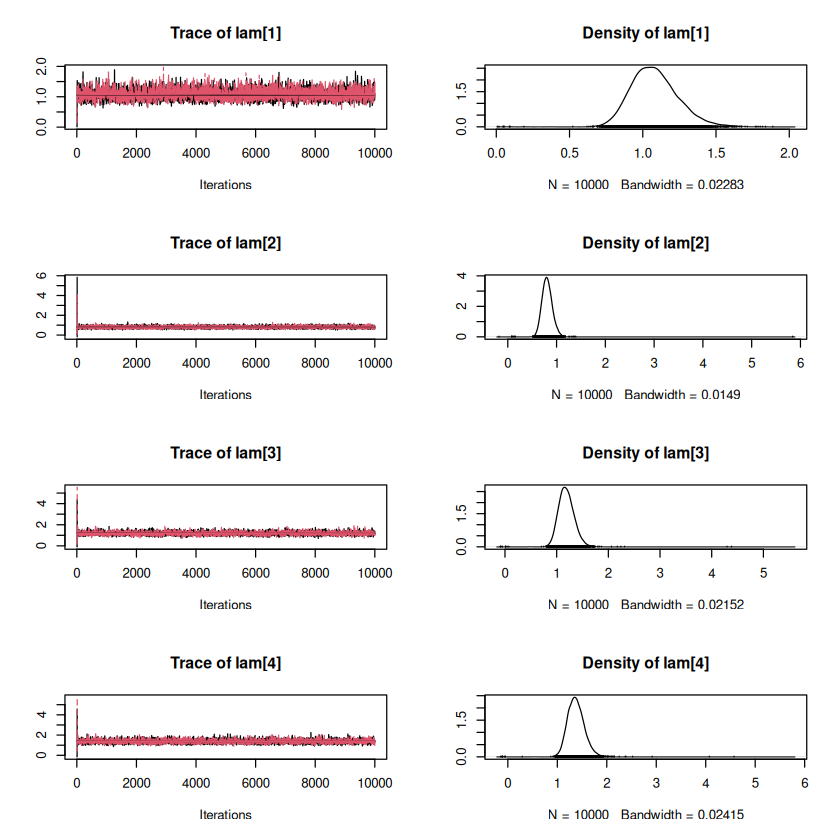

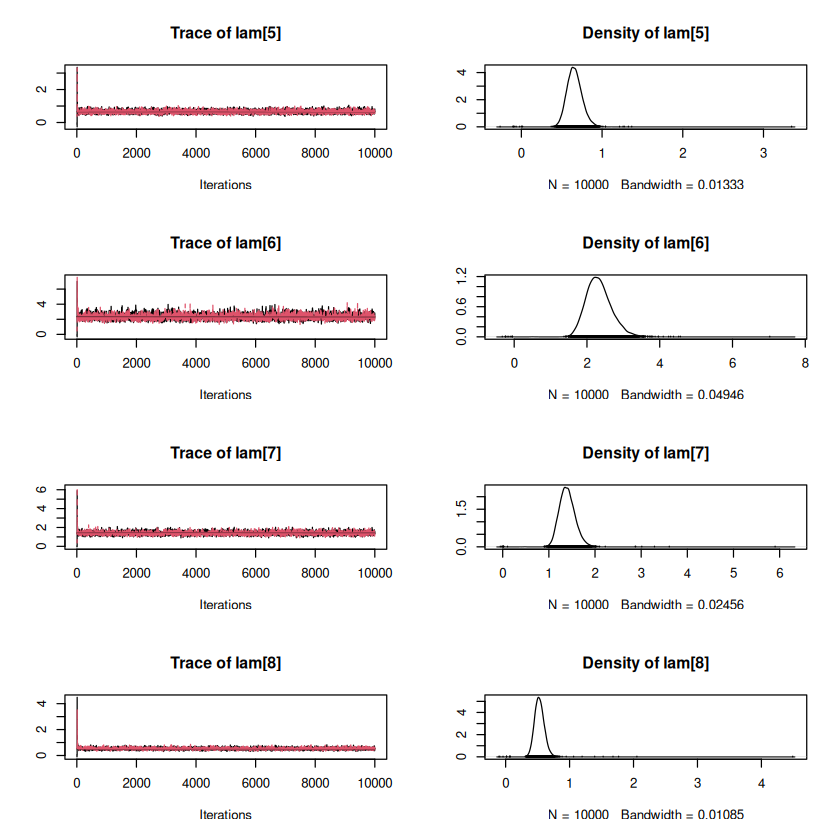

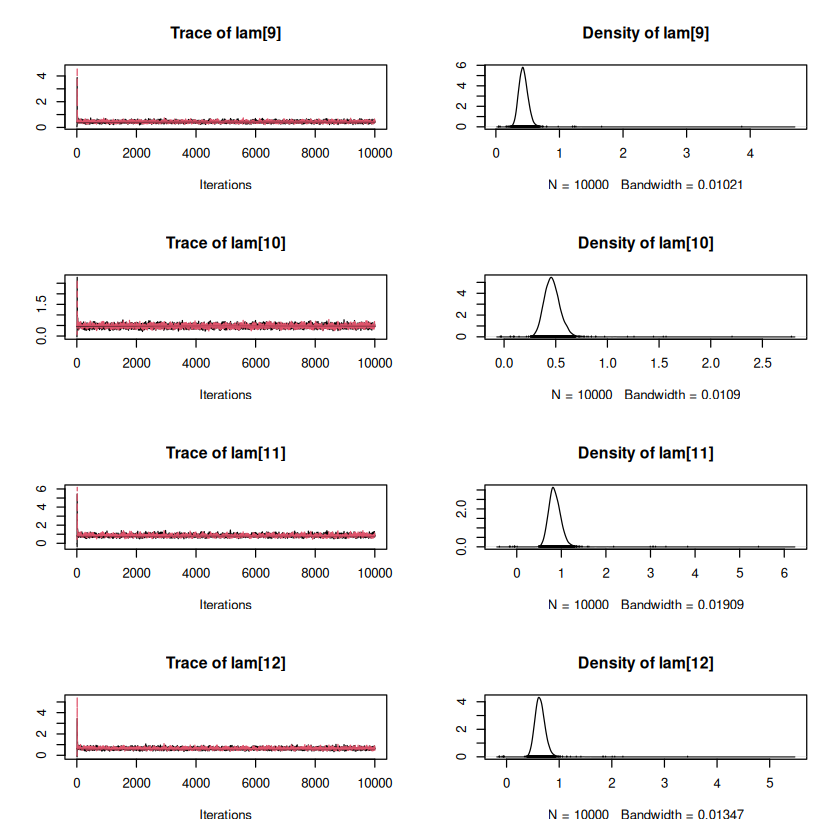

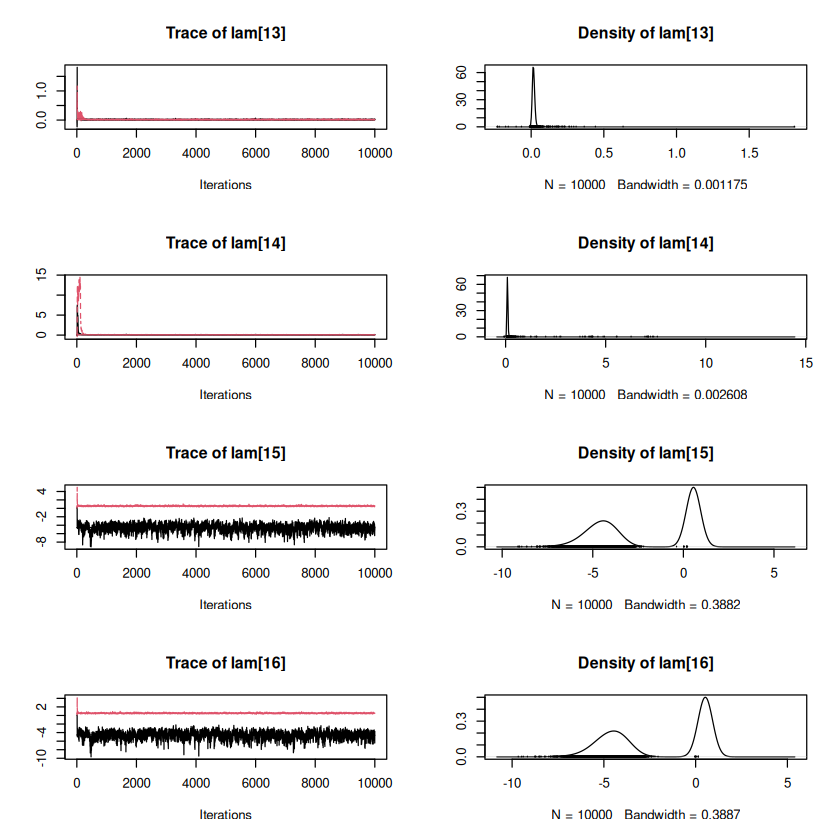

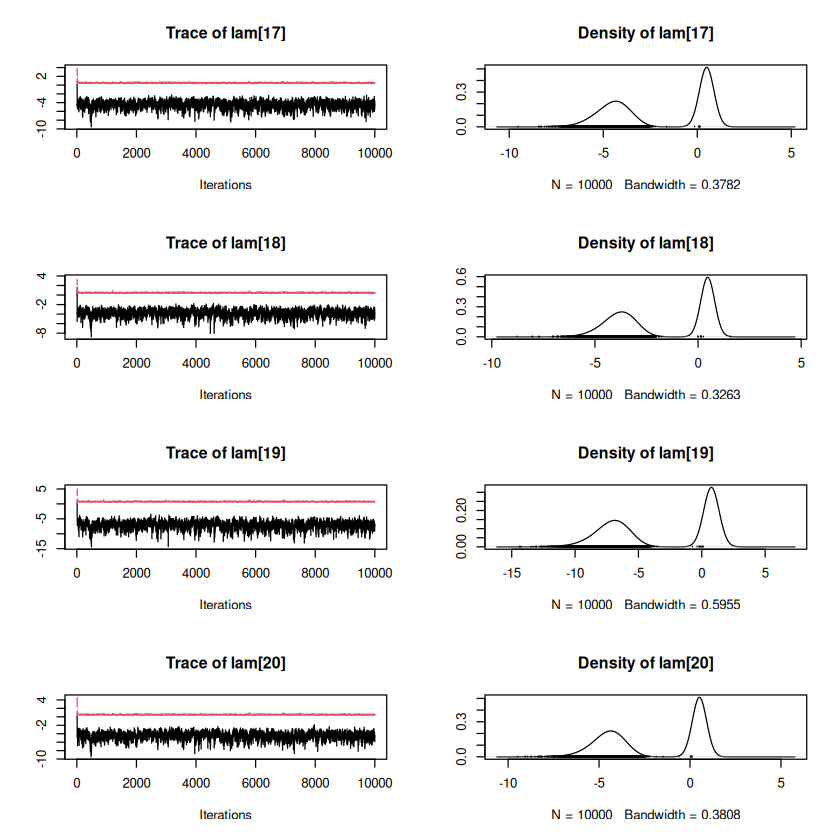

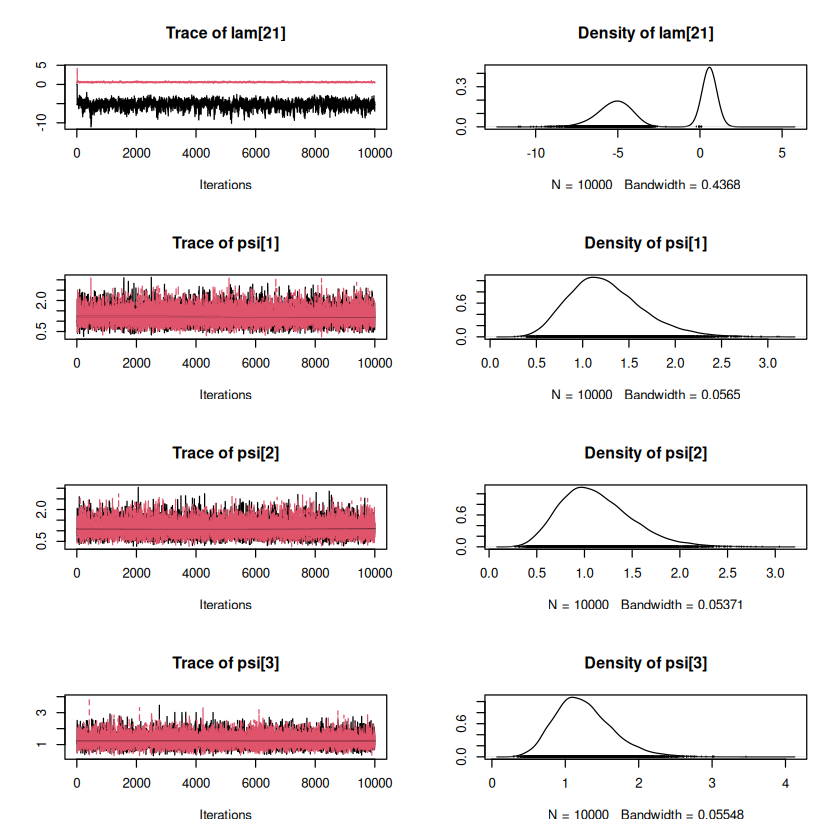

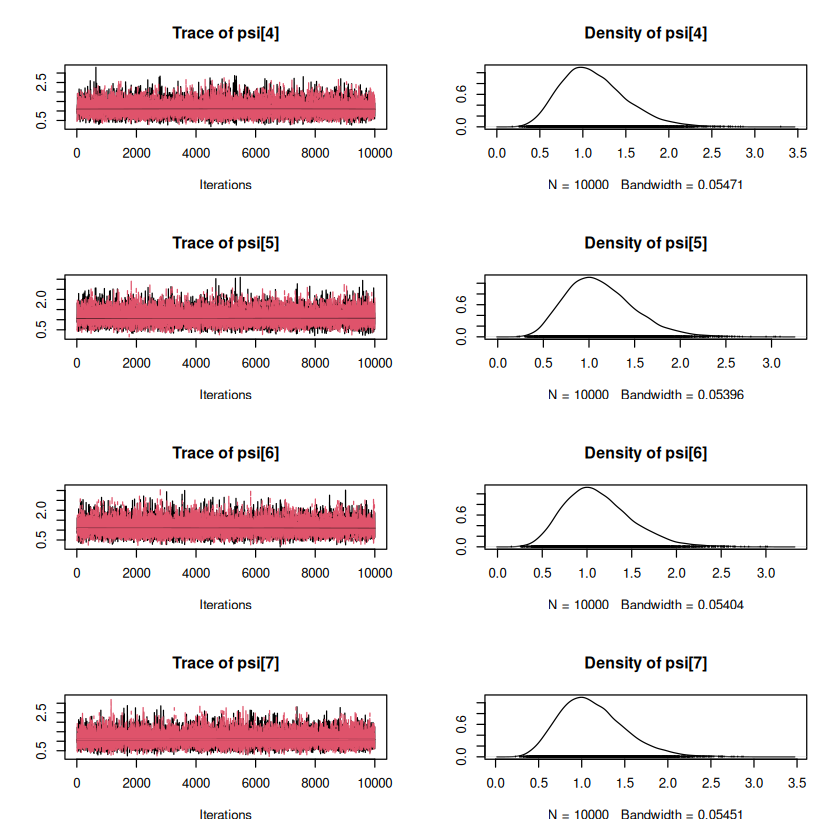

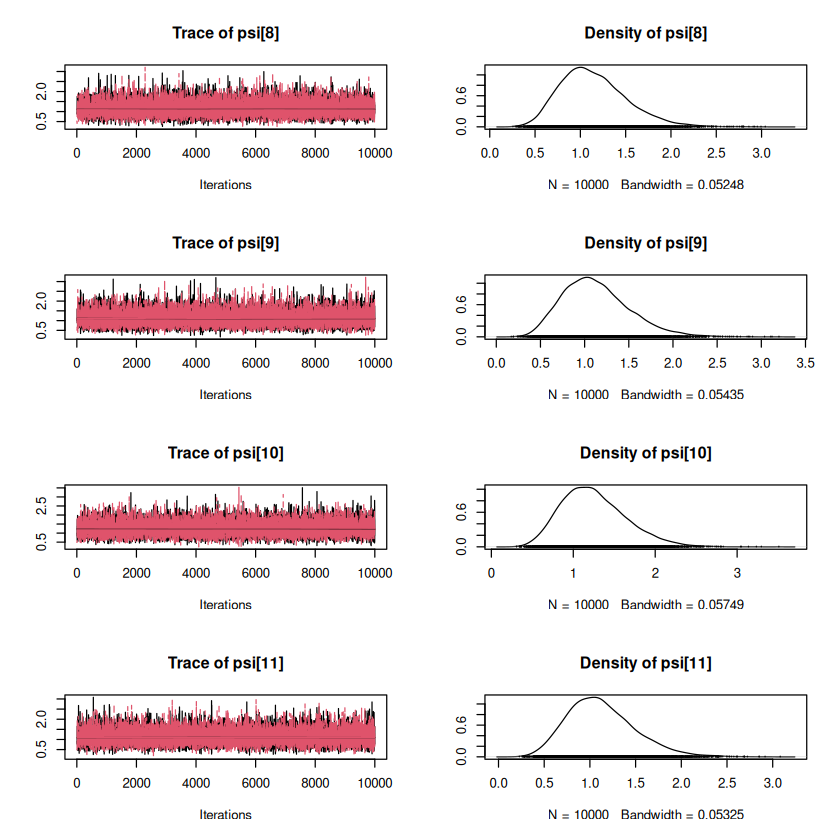

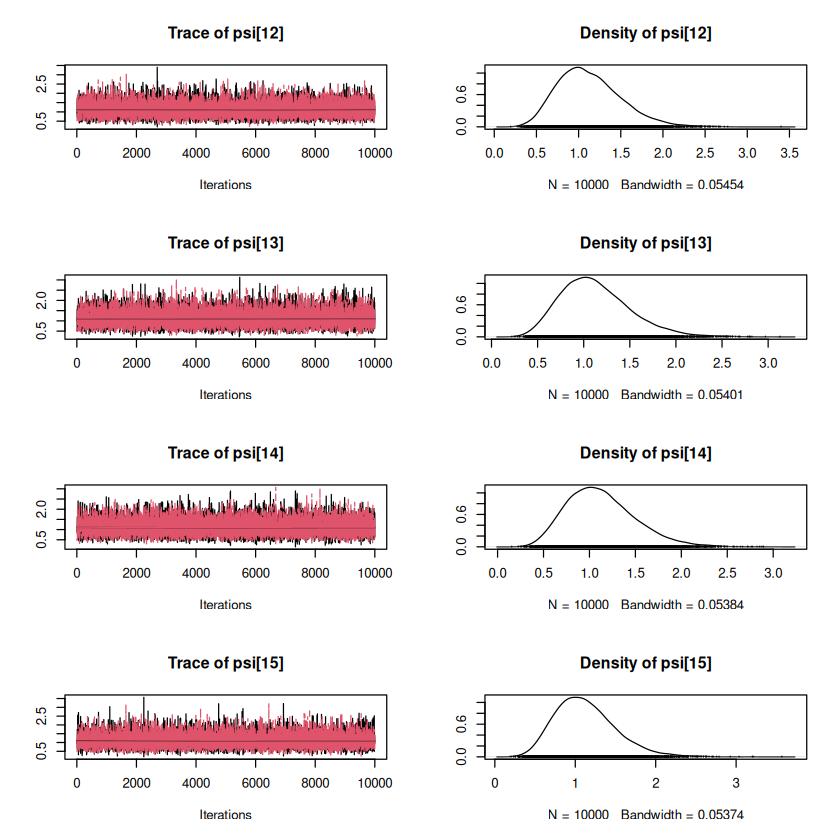

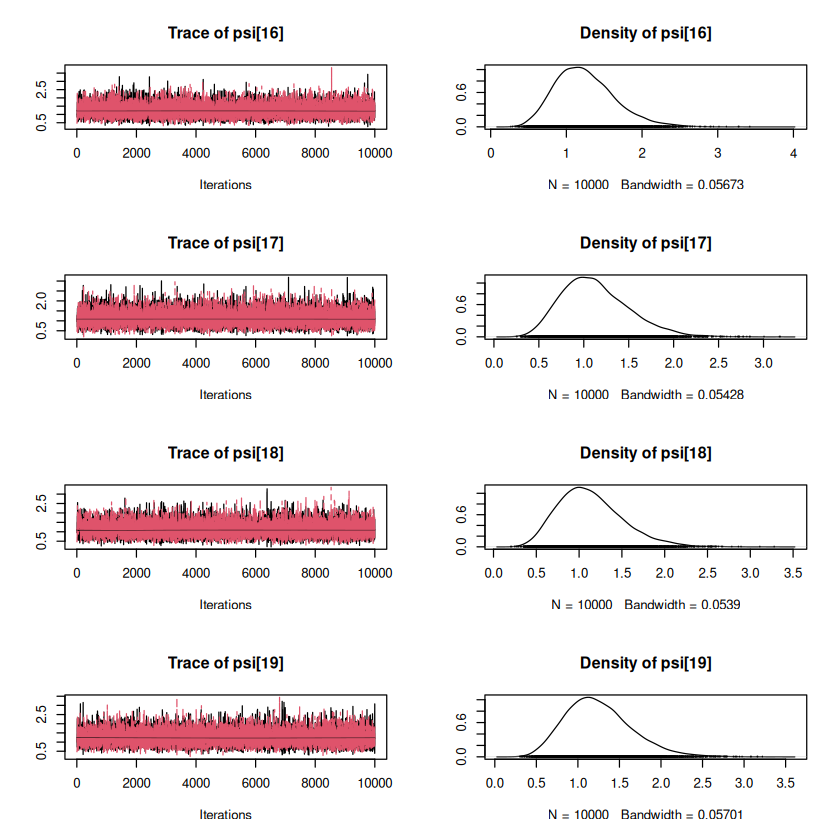

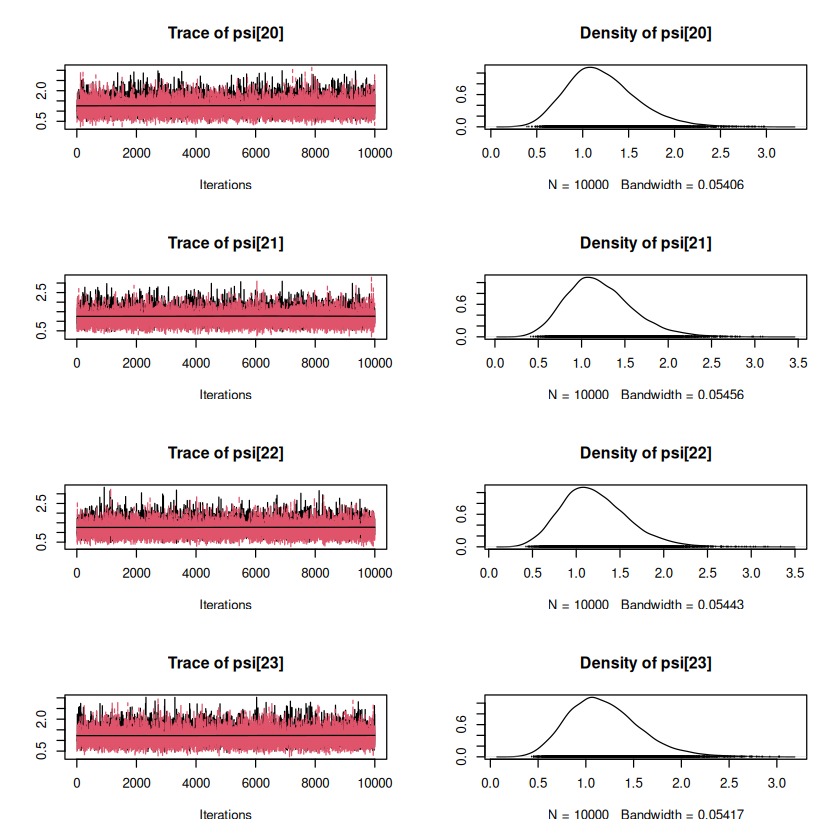

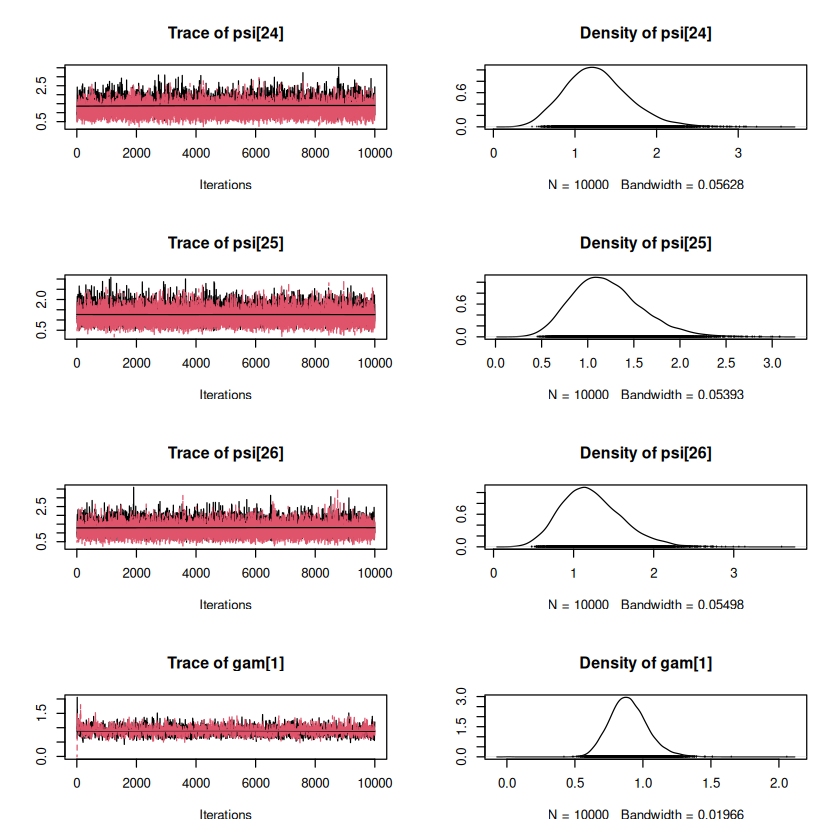

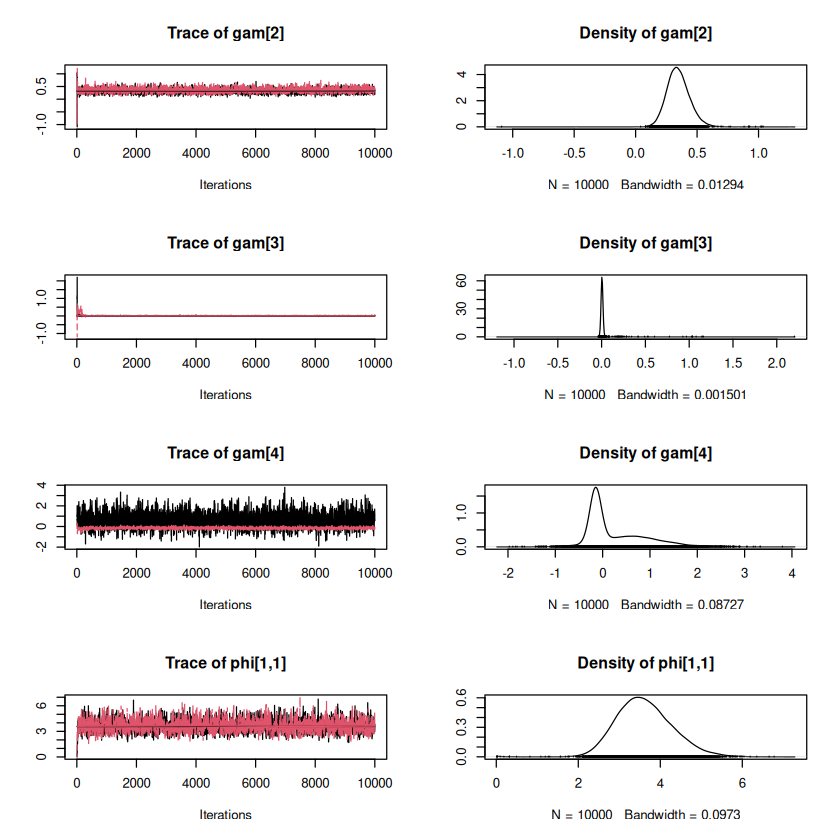

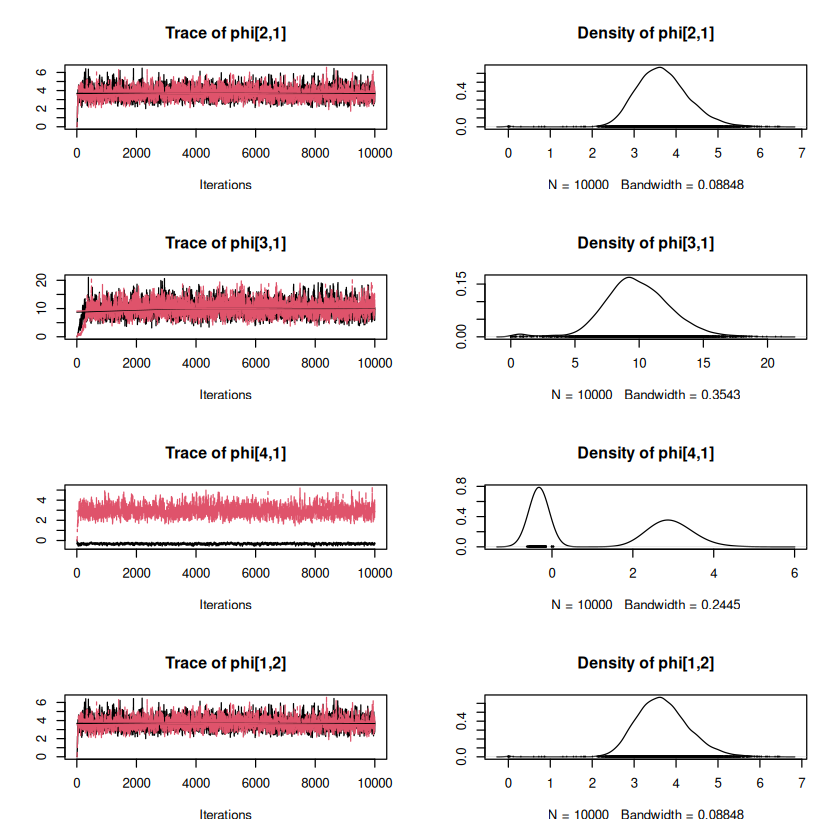

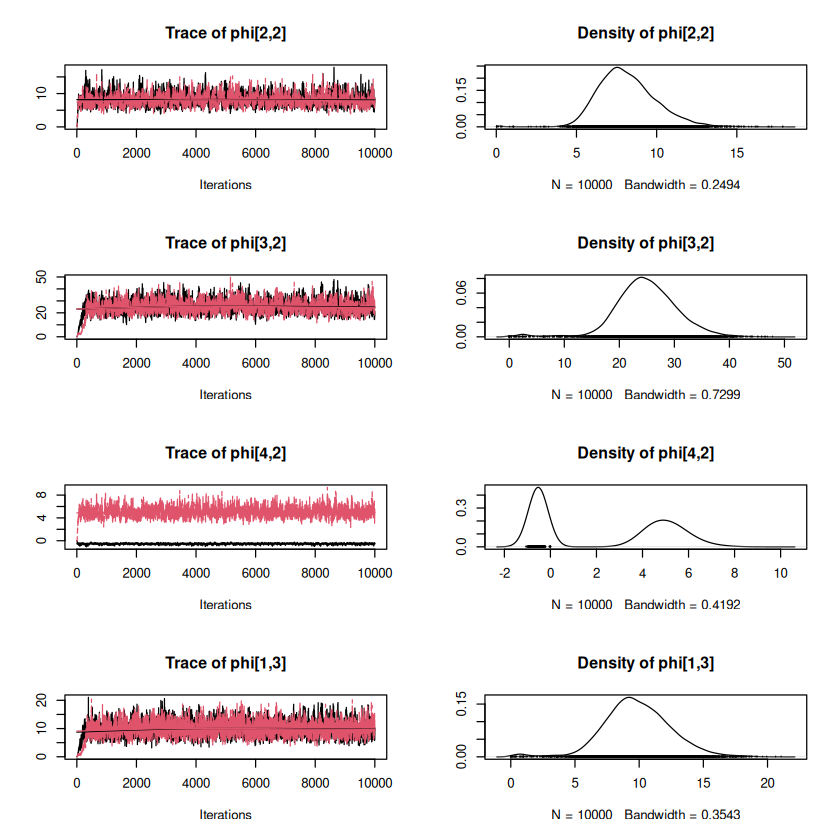

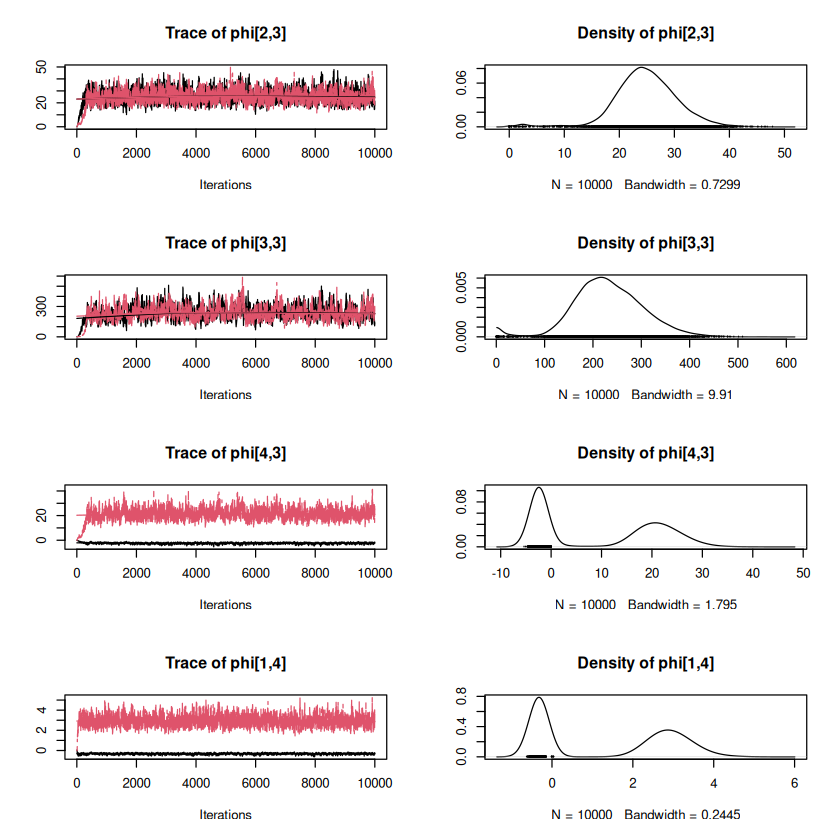

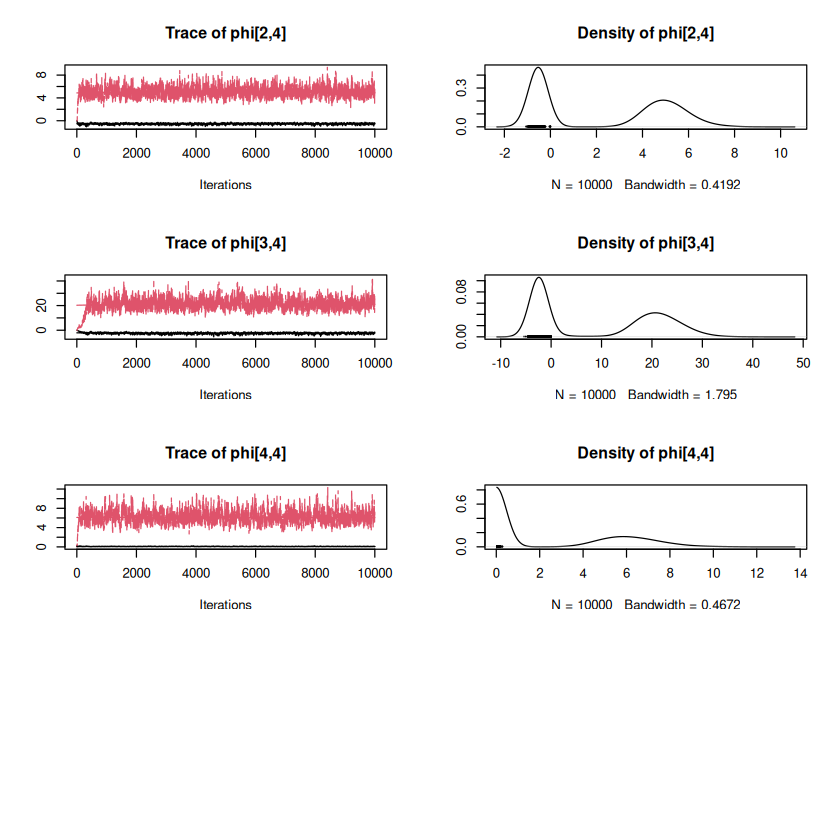

In [44]:
# Extract posterior draws for variables of interest.
fit2$draws(
    variables = param[-5],
    inc_warmup = TRUE,
    format = "df"
) %>% 
# Split data frame into list of dataframes by chain number.
split(f = .$.chain) %>% 
# Drop unneeded variables and convert to MCMC object.
lapply(
    function(x) {
        select(x, -c(".chain", ".iteration", ".draw")) %>%
        mcmc()
    }
)  %>%
# Plot posterior draws
mcmc.list() %>%
plot()

In [ ]:
posterior2 <- extract(fit2, inc_warmup = TRUE, permuted = FALSE)

In [107]:
draws <- fit2$draws(
    variables = param[-5],
    inc_warmup = TRUE,
    format = "df"
)
pars <- grep("lam", names(draws), value = TRUE)#names(draws)  %>% 
# .[!. %in% c('.chain', '.iteration', '.draw')]

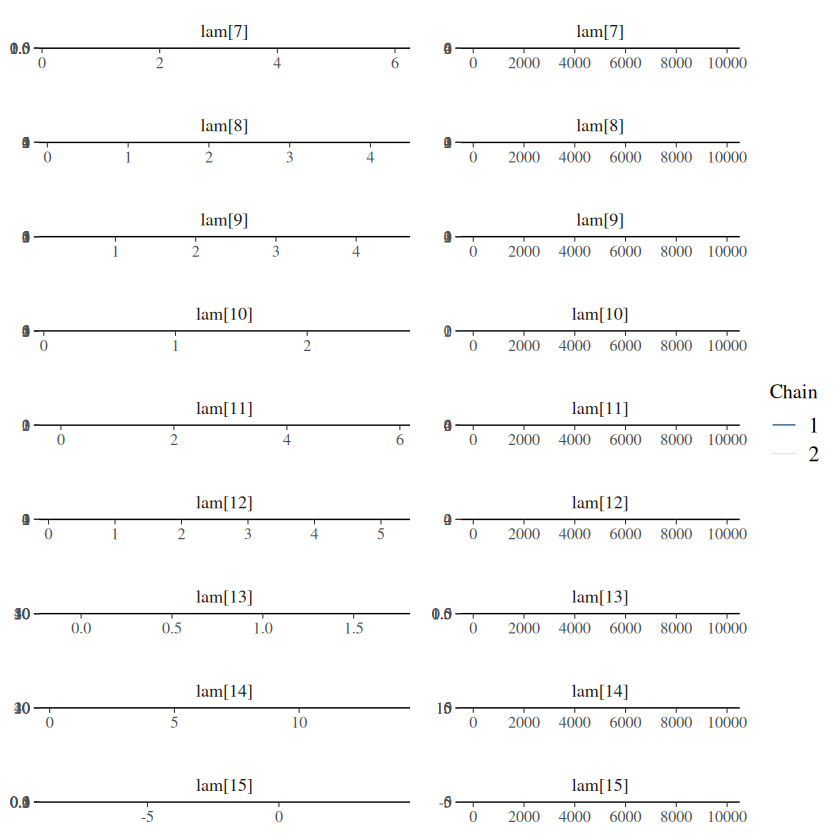

In [108]:
mcmc_combo(draws, pars = pars)

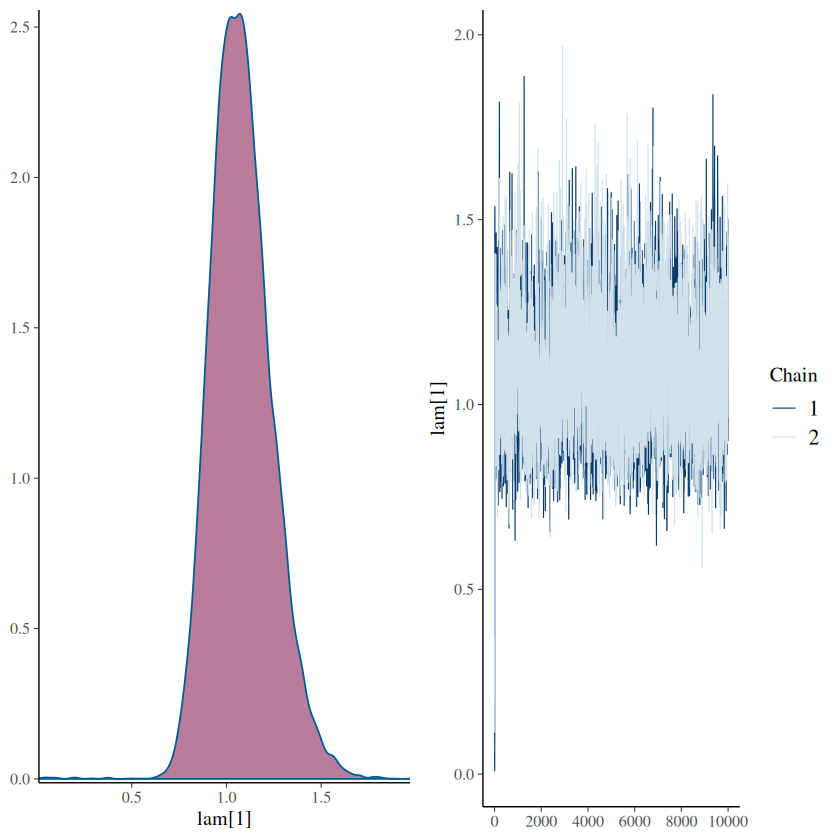

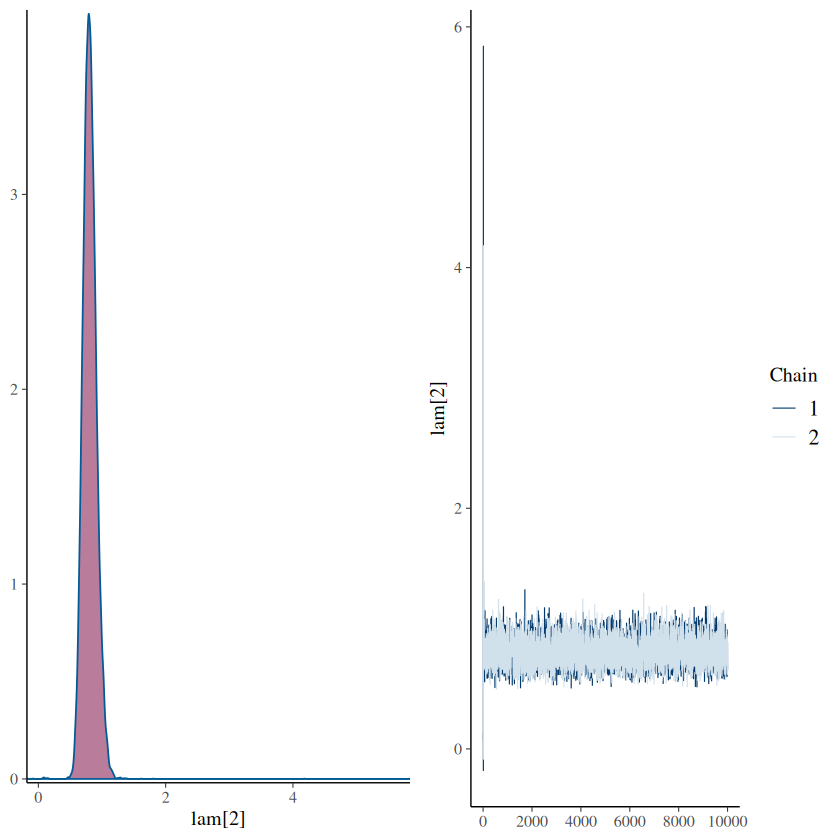

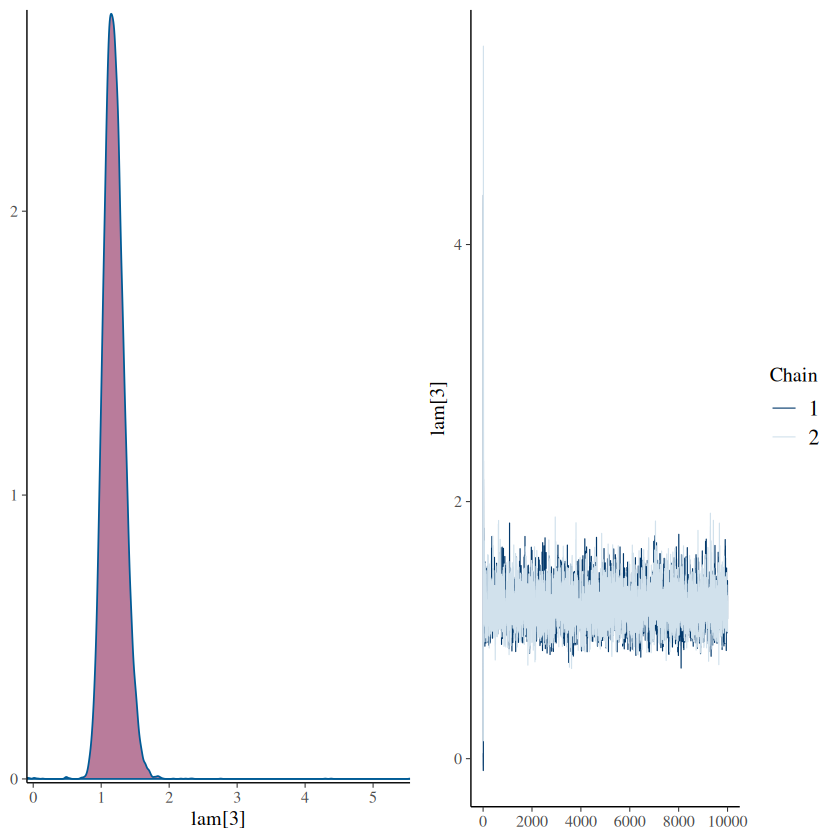

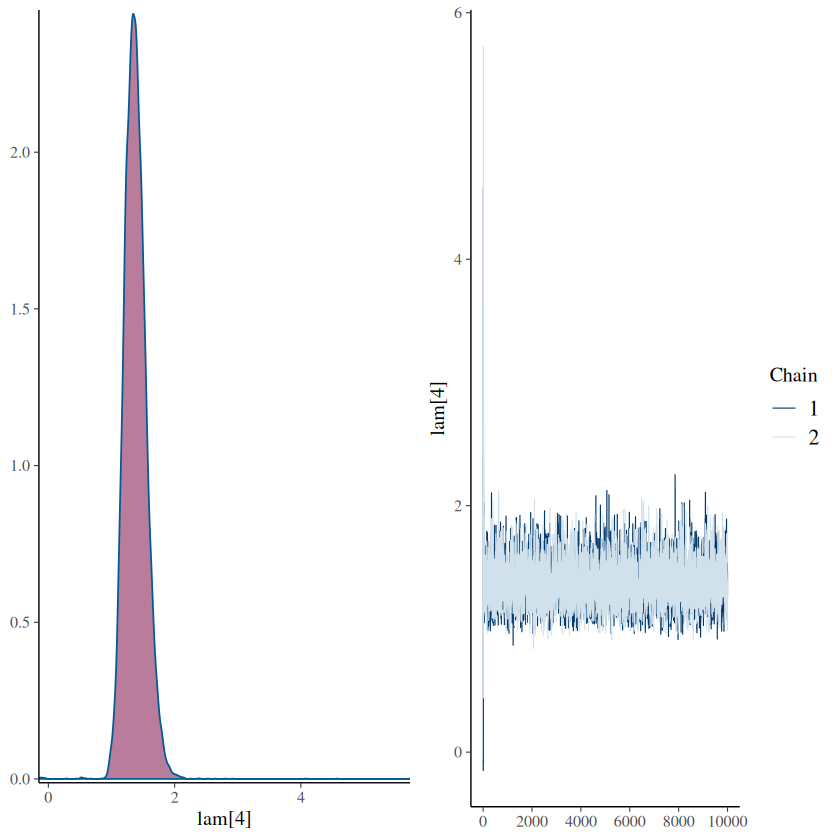

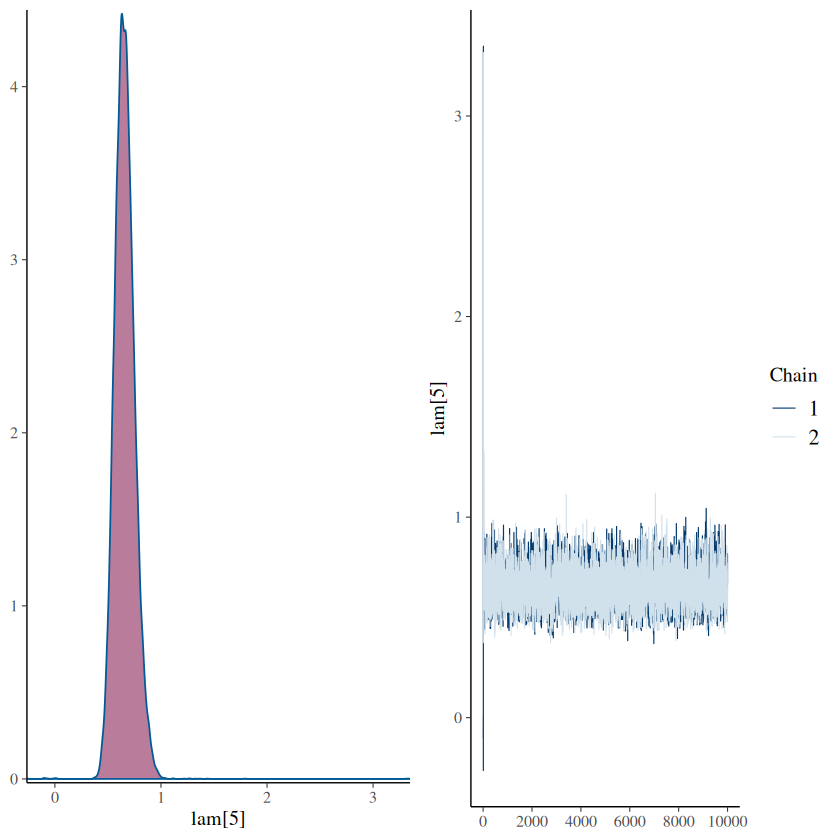

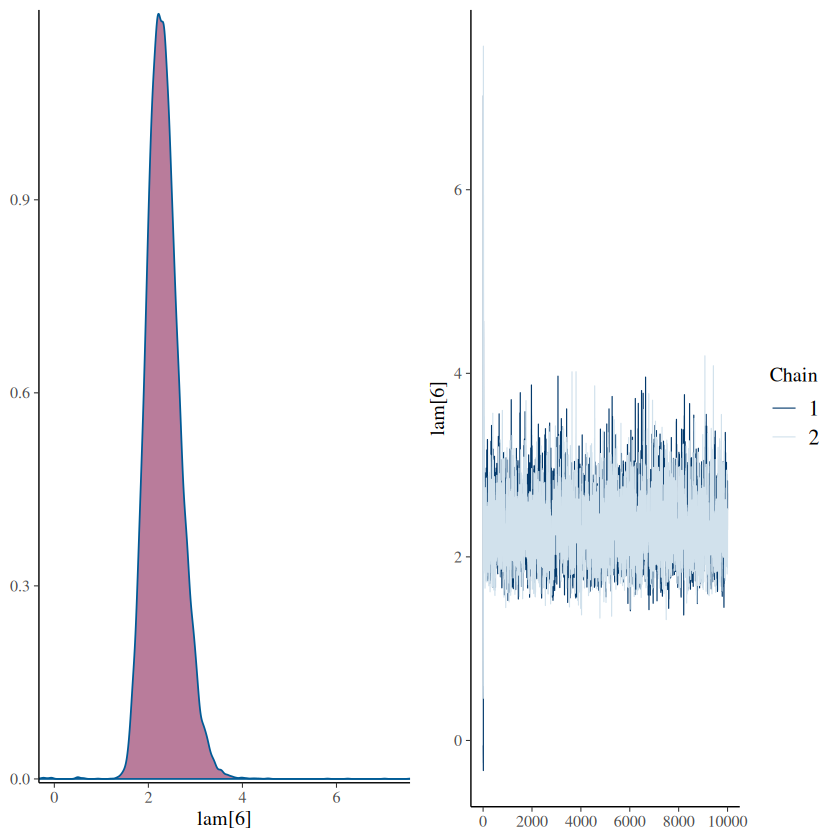

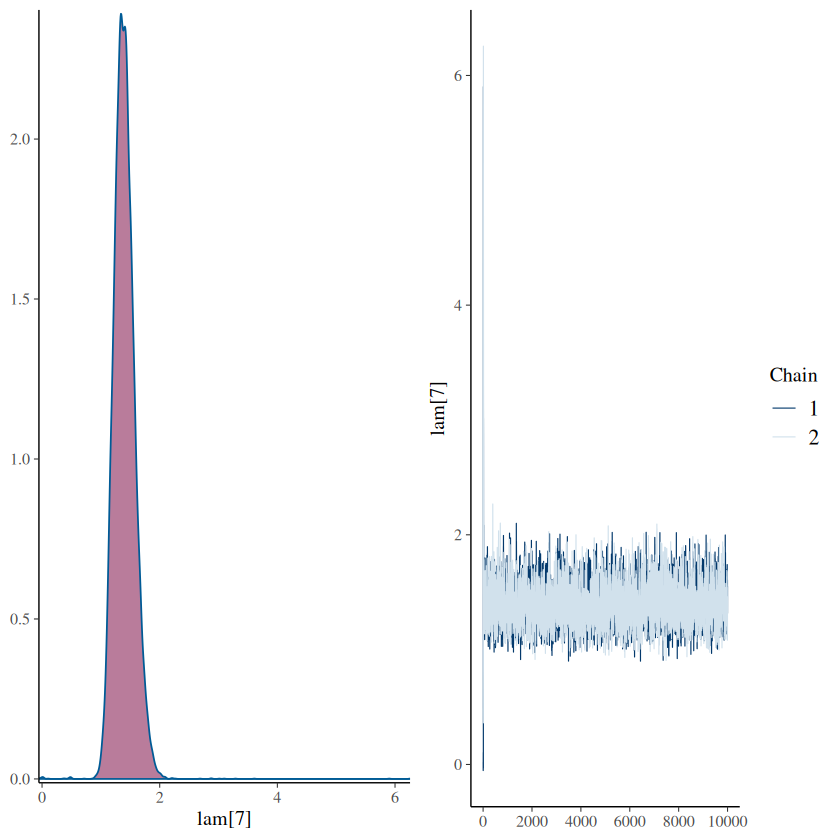

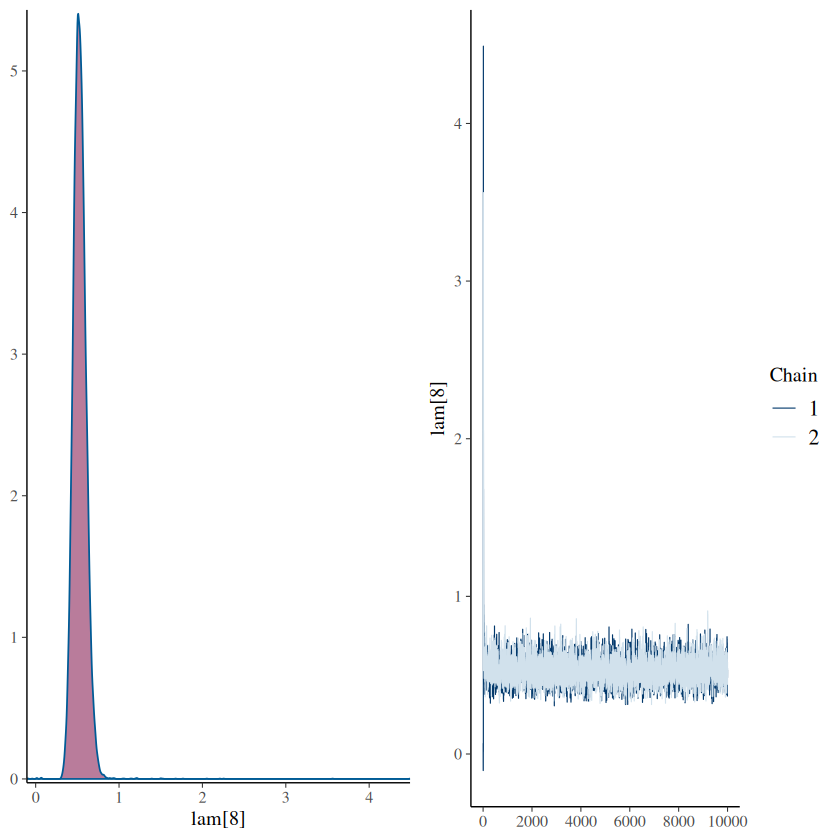

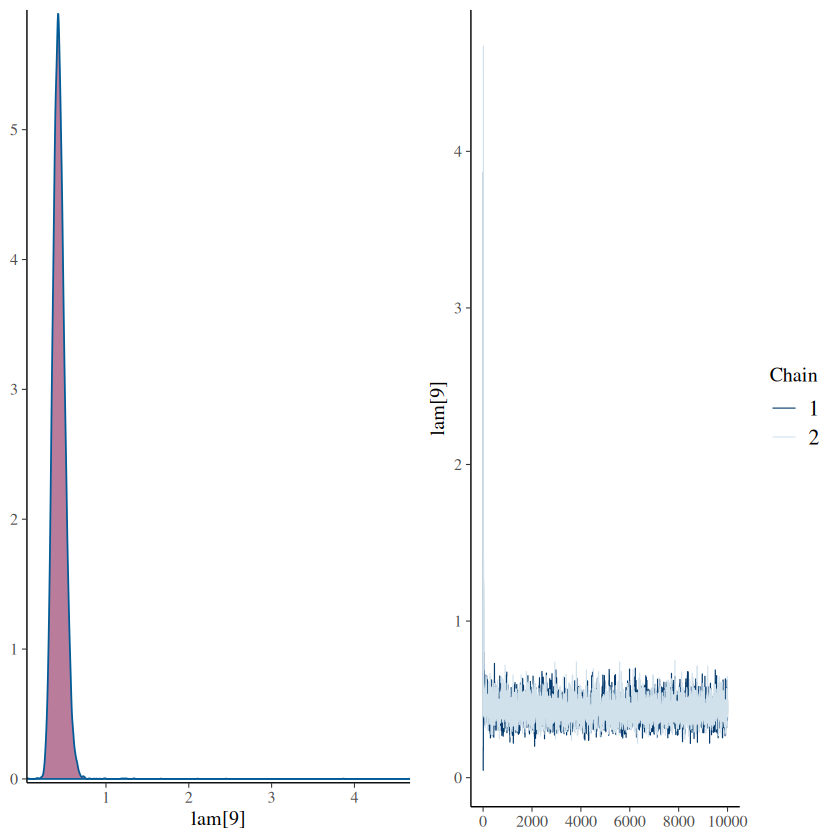

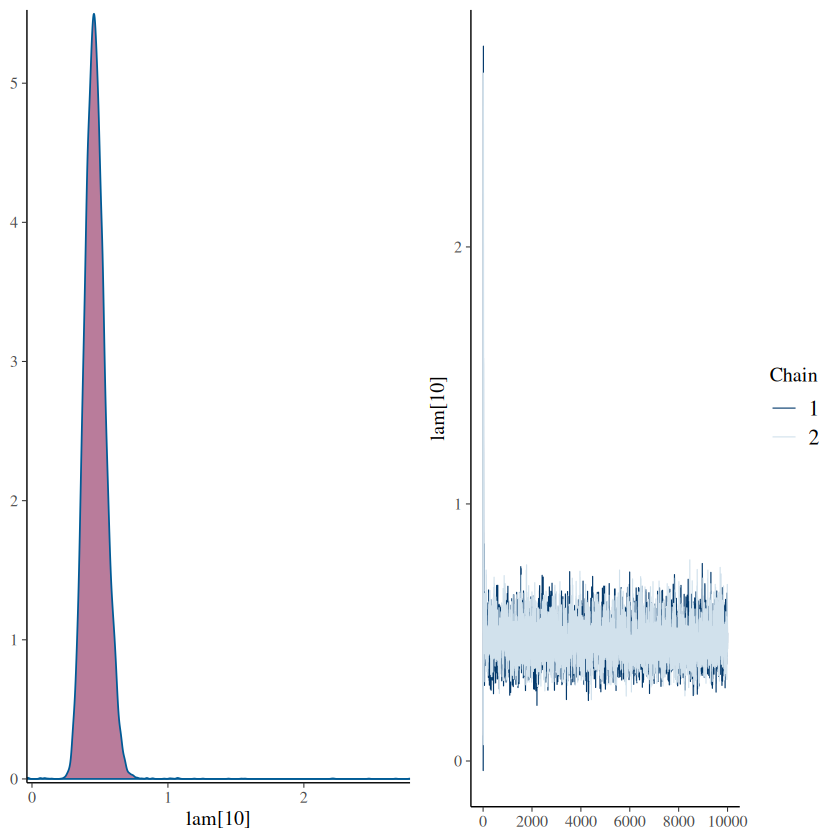

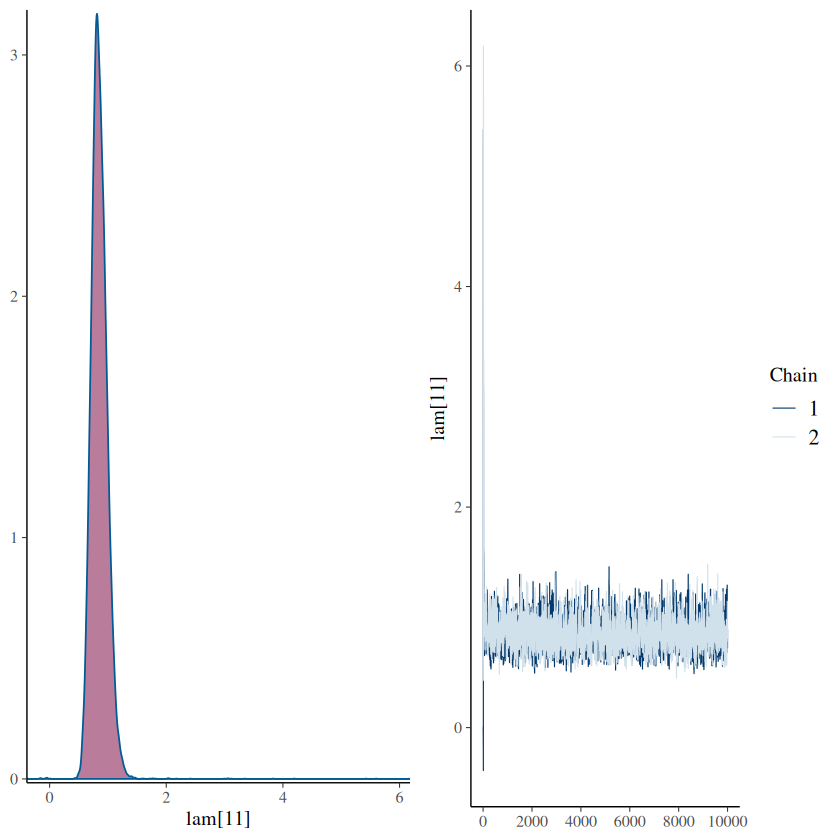

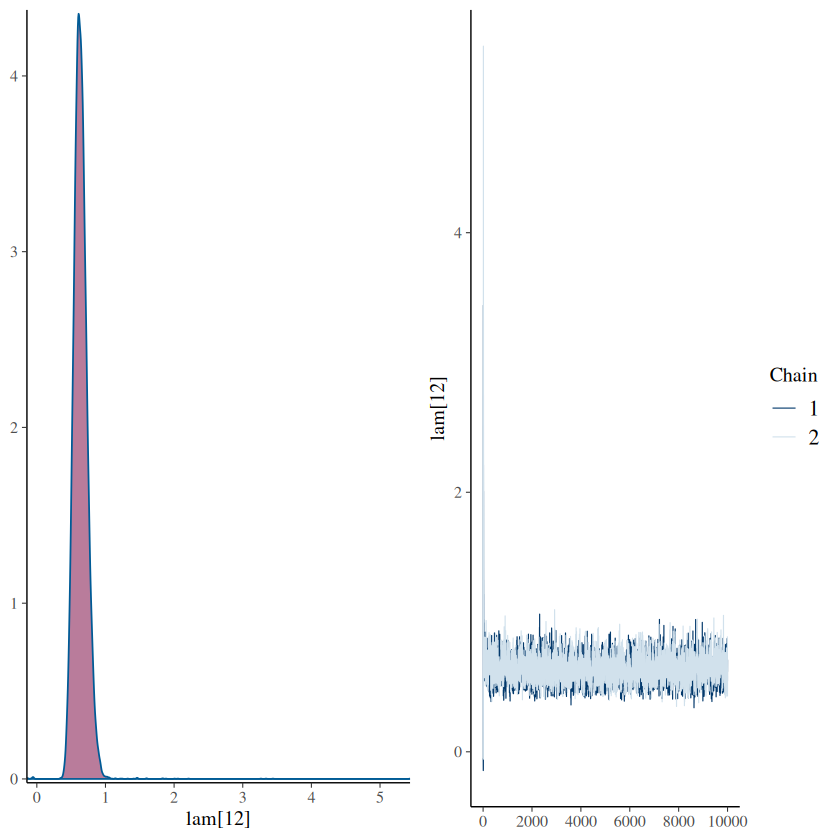

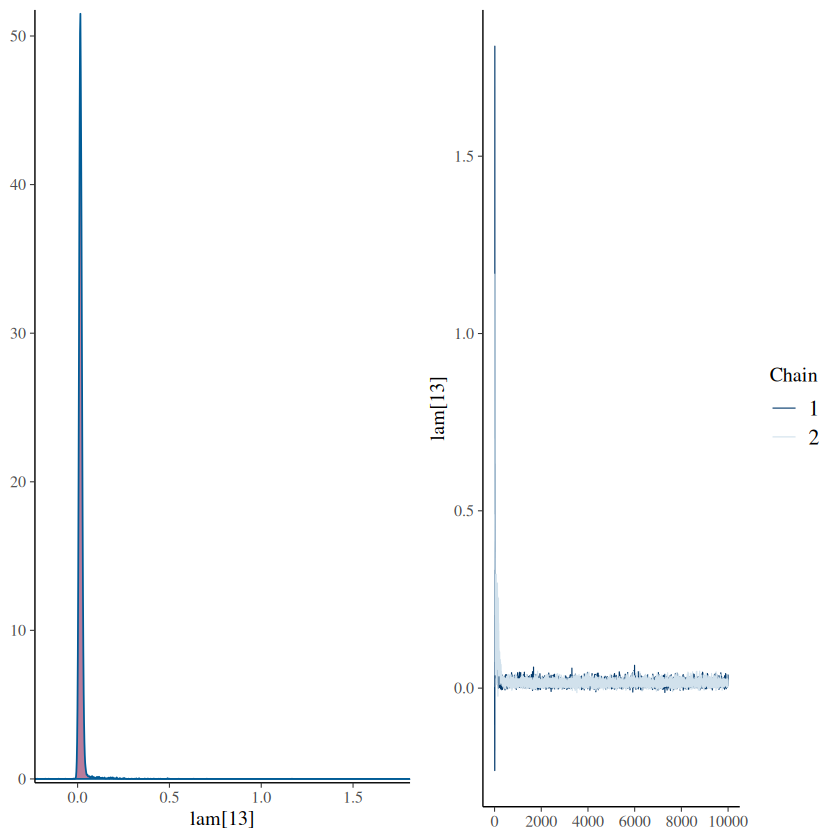

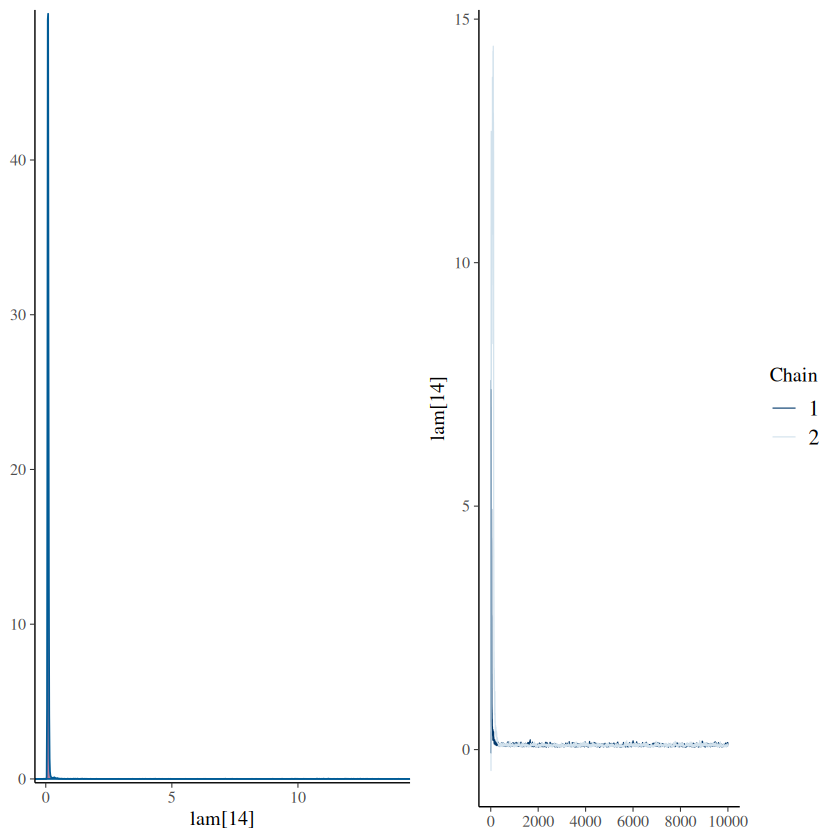

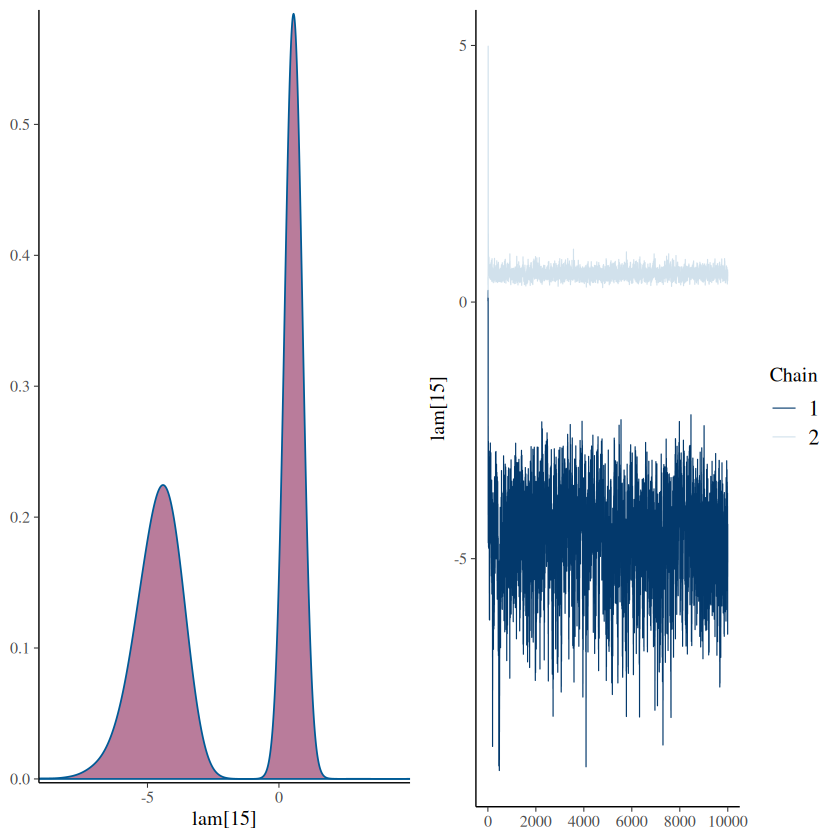

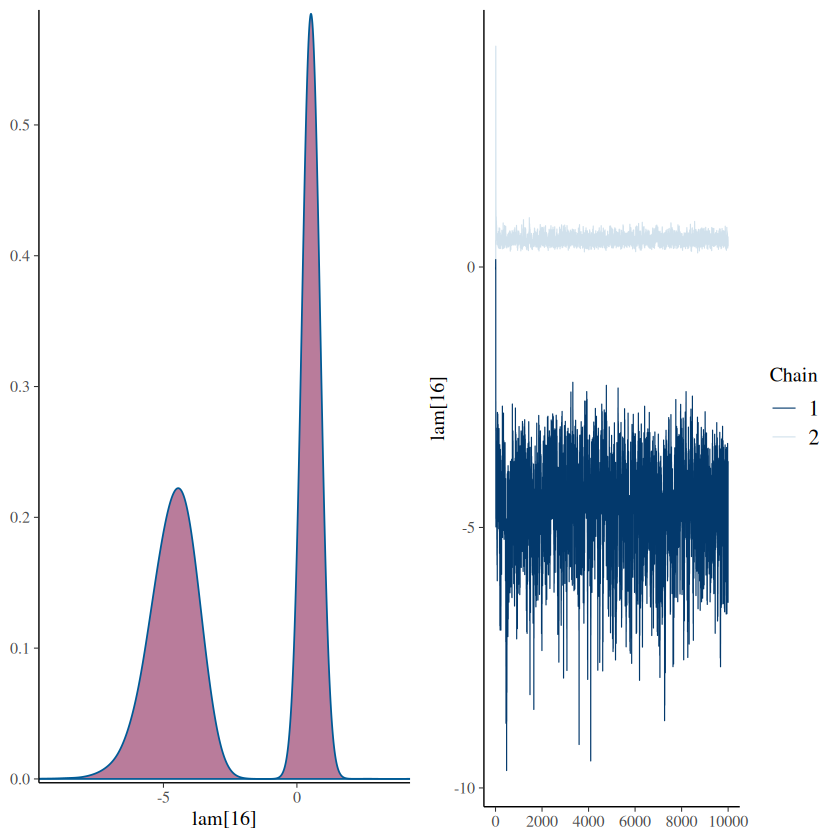

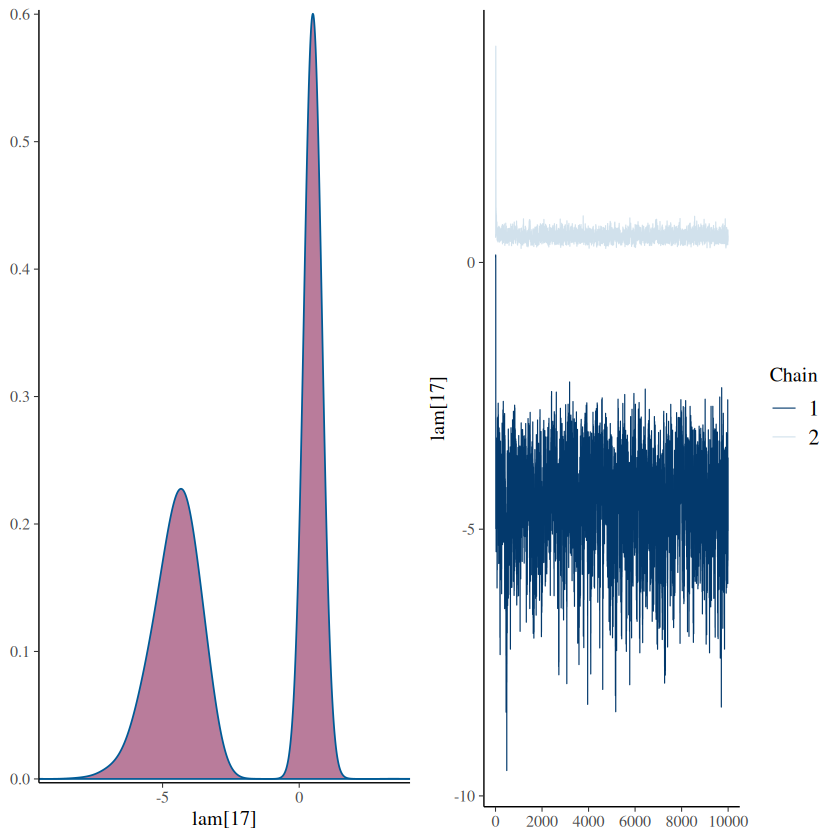

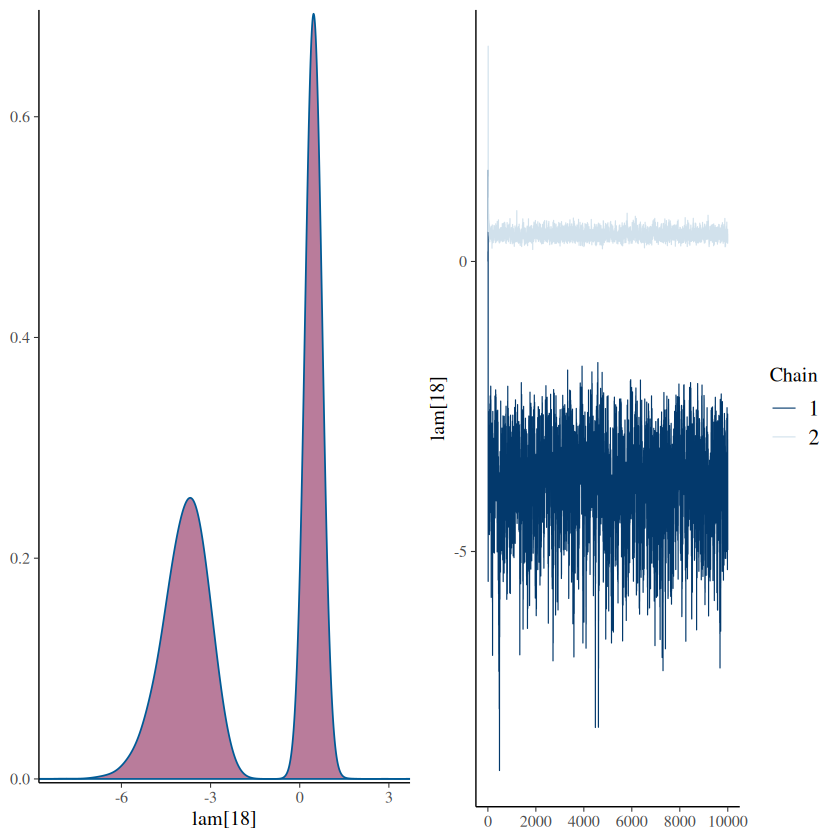

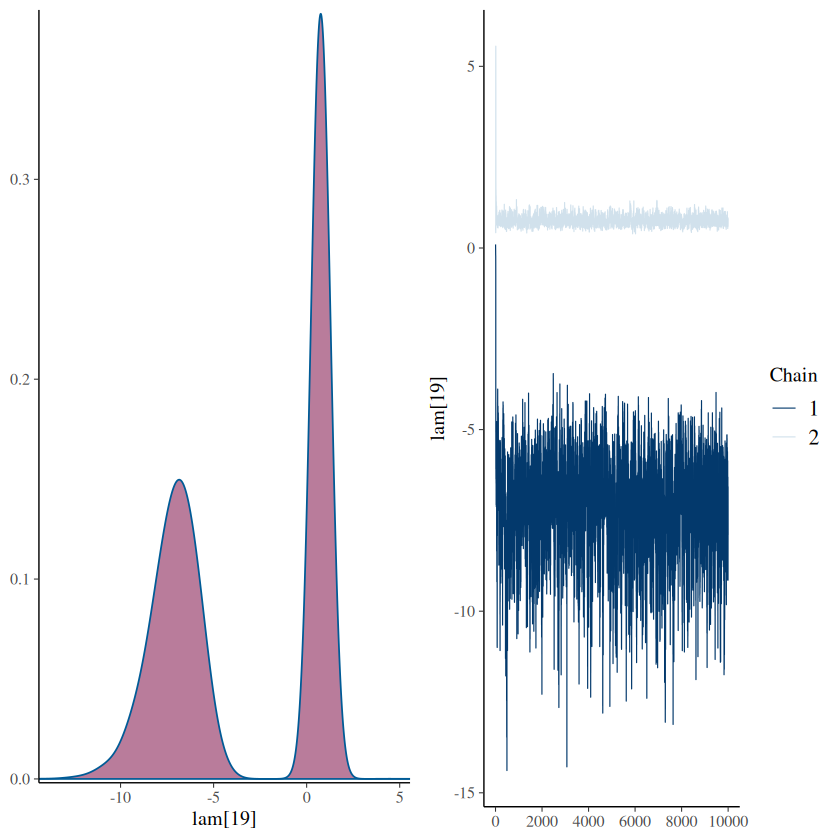

[[1]]

[[2]]

[[3]]

[[4]]

[[5]]

[[6]]

[[7]]

[[8]]

[[9]]

[[10]]

[[11]]

[[12]]

[[13]]

[[14]]

[[15]]

[[16]]

[[17]]

[[18]]

[[19]]

[[20]]

[[21]]


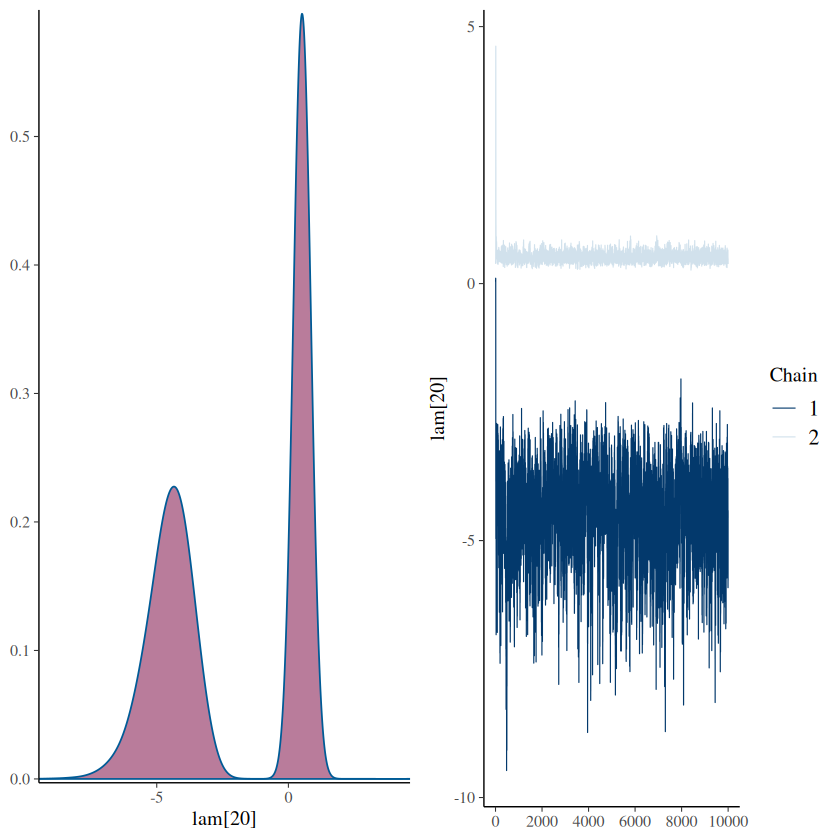

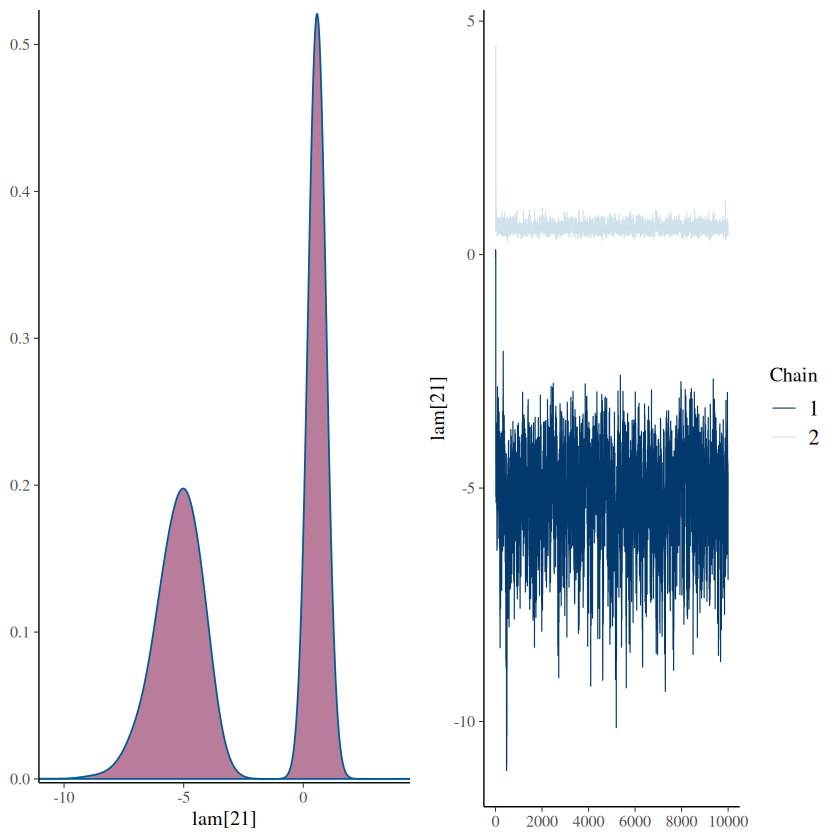

In [109]:
lapply(pars, function(x) {mcmc_combo(draws, pars = x)})

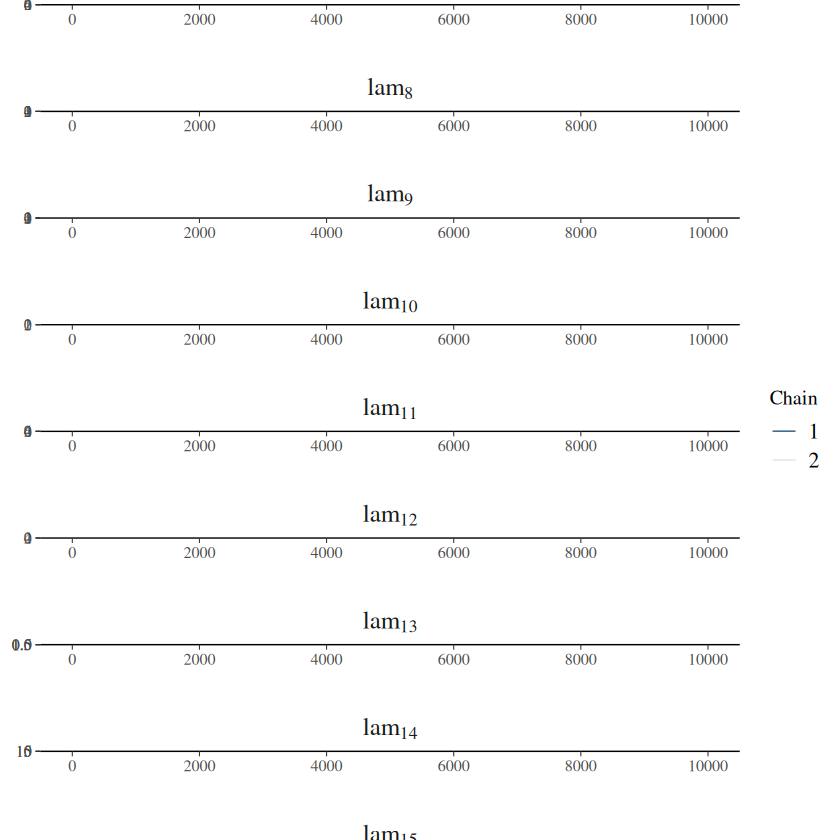

In [101]:
color_scheme_set("mix-blue-pink")
p <- mcmc_trace(
    draws,
    pars = grep("lam", names(draws), value = TRUE),
    n_warmup = 2000,
    facet_args = list(
        ncol = 1,
        labeller = label_parsed
    ),
)
p + facet_text(size = 15)

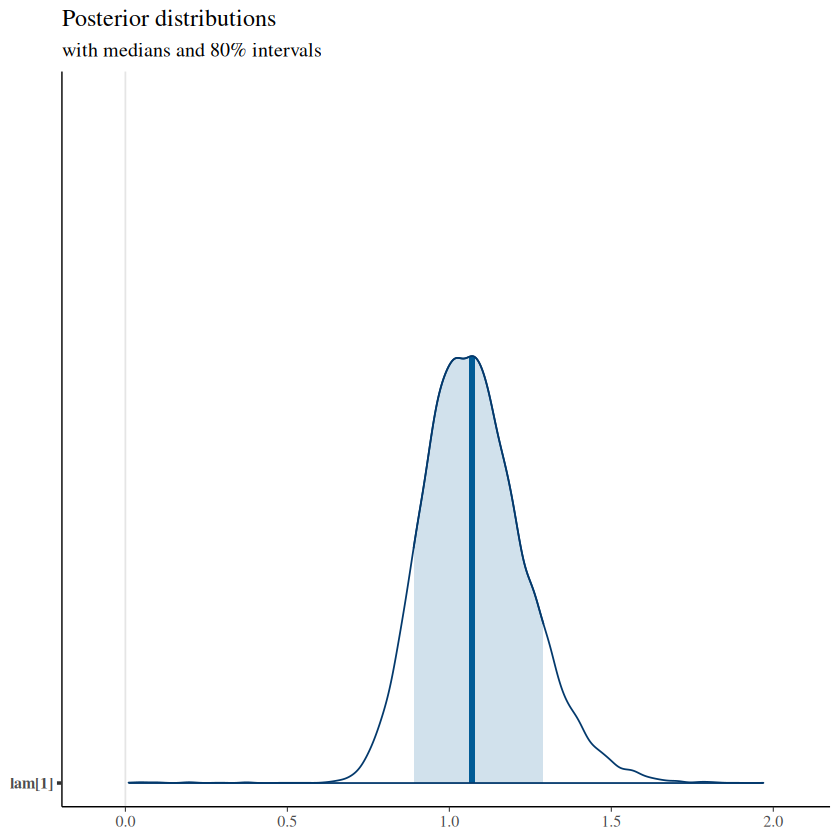

In [61]:
plot_title <- ggtitle("Posterior distributions",
                      "with medians and 80% intervals")
mcmc_areas(draws,
           pars = "lam[1]",
           prob = 0.8) + plot_title